## **1. Import Library**

In [65]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

import pickle

## **2. Load Dataset**

In [66]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')
submission = pd.read_csv('../datasets/sample_submission.csv')

In [67]:
train.head()

id  Age     BusinessTravel  DailyRate              Department  \
0  VM684   47      Travel_Rarely       1225                   Sales   
1  ZO618   22      Travel_Rarely        594  Research & Development   
2  JO233   46      Travel_Rarely        406                   Sales   
3  GW565   25      Travel_Rarely        622                   Sales   
4  OZ187   43  Travel_Frequently       1001  Research & Development   

   DistanceFromHome  Education    EducationField  EmployeeCount  \
0                 2          4     Life Sciences              1   
1                 2          1  Technical Degree              1   
2                 3          1         Marketing              1   
3                13          1           Medical              1   
4                 9          5           Medical              1   

   EmployeeNumber  ...  StandardHours StockOptionLevel  TotalWorkingYears  \
0            1676  ...             80                3                 29   
1             169  ...             80                1                  3   
2            1124  ...             80                1                 23   
3             645  ...             80                0                  7   
4             663  ...             80                1                 10   

   TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                      2                3              3                   2   
1                      2                3              2                   1   
2                      3                3             12                   9   
3                      1                3              7                   4   
4                      3                3              8                   7   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  
0                       1                     2          0  
1                       2                     1          0  
2                       4                     9          0  
3                       0                     6          0  
4                       4                     7          0  

[5 rows x 36 columns]

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1176 non-null   object
 1   Age                       1176 non-null   int64 
 2   BusinessTravel            1176 non-null   object
 3   DailyRate                 1176 non-null   int64 
 4   Department                1176 non-null   object
 5   DistanceFromHome          1176 non-null   int64 
 6   Education                 1176 non-null   int64 
 7   EducationField            1176 non-null   object
 8   EmployeeCount             1176 non-null   int64 
 9   EmployeeNumber            1176 non-null   int64 
 10  EnvironmentSatisfaction   1176 non-null   int64 
 11  Gender                    1176 non-null   object
 12  HourlyRate                1176 non-null   int64 
 13  JobInvolvement            1176 non-null   int64 
 14  JobLevel                

In [69]:
train.describe(include = 'number')

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1176.000000  1176.000000       1176.000000  1176.000000         1176.0   
mean     36.998299   803.991497          9.357993     2.906463            1.0   
std       9.178142   401.339423          8.179803     1.027996            0.0   
min      18.000000   103.000000          1.000000     1.000000            1.0   
25%      30.000000   467.750000          2.000000     2.000000            1.0   
50%      36.000000   799.500000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1176.000000              1176.000000  1176.000000     1176.000000   
mean      1015.830782                 2.716837    65.500000        2.737245   
std        599.657438                 1.088707    20.373324        0.703673   
min          1.000000                 1.000000    30.000000        1.000000   
25%        487.750000                 2.000000    48.000000        2.000000   
50%       1004.500000                 3.000000    66.000000        3.000000   
75%       1547.250000                 4.000000    83.000000        3.000000   
max       2062.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  StandardHours  StockOptionLevel  TotalWorkingYears  \
count  1176.000000  ...         1176.0       1176.000000        1176.000000   
mean      2.076531  ...           80.0          0.790816          11.364796   
std       1.091987  ...            0.0          0.845786           7.801391   
min       1.000000  ...           80.0          0.000000           0.000000   
25%       1.000000  ...           80.0          0.000000           6.000000   
50%       2.000000  ...           80.0          1.000000          10.000000   
75%       3.000000  ...           80.0          1.000000          15.000000   
max       5.000000  ...           80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1176.000000      1176.000000     1176.000000   
mean                2.760204         2.757653        7.050170   
std                 1.256262         0.718113        6.086612   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000       10.000000   
max                 6.000000         4.000000       37.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
count         1176.000000              1176.000000           1176.000000   
mean             4.231293                 2.182823              4.196429   
std              3.569503                 3.215348              3.564795   
min              0.000000                 0.000000              0.000000   
25%              2.000000                 0.000000              2.000000   
50%              3.000000                 1.000000              3.000000   
75%              7.000000                 3.000000              7.000000   
max             17.000000                15.000000             17.000000   

         Attrition  
count  1176.000000  
mean      0.161565  
std       0.368208  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 27 columns]

In [70]:
train.describe(include = 'object')

id BusinessTravel              Department EducationField Gender  \
count    1176           1176                    1176           1176   1176   
unique   1173              3                       3              6      2   
top     TP136  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        2            828                     764            479    704   

                JobRole MaritalStatus Over18 OverTime  
count              1176          1176   1176     1176  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                273           540   1176      836

## **3. Quick EDA**

In [71]:

# Generate descriptive statistics
desc_stats = train.describe().T
desc_stats['Count'] = train.shape[0]  # Jika ingin count sama untuk semua fitur
# Atau jika ingin count per feature:
desc_stats['Count'] = train.count()

# Format the table for GitHub
github_table = desc_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']].copy()
github_table.columns = ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']

# Format numbers for better readability
def format_numbers(x):
    if isinstance(x, (int, np.integer)):
        return f"{x:,.0f}"
    elif isinstance(x, float):
        if abs(x) >= 1000:
            return f"{x:,.2f}"
        else:
            return f"{x:.4f}"
    return str(x)

# Apply formatting
for col in github_table.columns:
    github_table[col] = github_table[col].apply(format_numbers)

# Print Markdown table
print("| Fitur | Count | Mean | Std | Min | 25% | 50% | 75% | Max |")
print("|-------|-------|------|-----|-----|-----|-----|-----|-----|")
for idx, row in github_table.iterrows():
    print(f"| {idx} | {row['Count']} | {row['Mean']} | {row['Std']} | {row['Min']} | {row['25%']} | {row['50%']} | {row['75%']} | {row['Max']} |")

| Fitur | Count | Mean | Std | Min | 25% | 50% | 75% | Max |
|-------|-------|------|-----|-----|-----|-----|-----|-----|
| Age | 1,176.00 | 36.9983 | 9.1781 | 18.0000 | 30.0000 | 36.0000 | 43.0000 | 60.0000 |
| DailyRate | 1,176.00 | 803.9915 | 401.3394 | 103.0000 | 467.7500 | 799.5000 | 1,157.00 | 1,499.00 |
| DistanceFromHome | 1,176.00 | 9.3580 | 8.1798 | 1.0000 | 2.0000 | 7.0000 | 14.0000 | 29.0000 |
| Education | 1,176.00 | 2.9065 | 1.0280 | 1.0000 | 2.0000 | 3.0000 | 4.0000 | 5.0000 |
| EmployeeCount | 1,176.00 | 1.0000 | 0.0000 | 1.0000 | 1.0000 | 1.0000 | 1.0000 | 1.0000 |
| EmployeeNumber | 1,176.00 | 1,015.83 | 599.6574 | 1.0000 | 487.7500 | 1,004.50 | 1,547.25 | 2,062.00 |
| EnvironmentSatisfaction | 1,176.00 | 2.7168 | 1.0887 | 1.0000 | 2.0000 | 3.0000 | 4.0000 | 4.0000 |
| HourlyRate | 1,176.00 | 65.5000 | 20.3733 | 30.0000 | 48.0000 | 66.0000 | 83.0000 | 100.0000 |
| JobInvolvement | 1,176.00 | 2.7372 | 0.7037 | 1.0000 | 2.0000 | 3.0000 | 3.0000 | 4.0000 |
| JobLevel | 1

In [72]:
# Final version untuk README
target_column = 'Attrition'
numeric_cols = train.select_dtypes(include=[np.number]).columns

grouped_means = train.groupby(target_column)[numeric_cols].mean().T

# Format khusus
formatted = grouped_means.copy()
for col in formatted.columns:
    formatted[col] = formatted[col].apply(lambda x: f"{x:,.2f}" if x >= 1000 else f"{x:.2f}")

print("## Rata-rata Fitur per Kategori Attrition\n")
print(formatted.to_markdown())

## Rata-rata Fitur per Kategori Attrition

|                          | 0         | 1         |
|:-------------------------|:----------|:----------|
| Age                      | 37.74     | 33.13     |
| DailyRate                | 816.56    | 738.74    |
| DistanceFromHome         | 9.05      | 10.97     |
| Education                | 2.92      | 2.84      |
| EmployeeCount            | 1.00      | 1.00      |
| EmployeeNumber           | 1,009.80  | 1,047.15  |
| EnvironmentSatisfaction  | 2.77      | 2.44      |
| HourlyRate               | 65.67     | 64.60     |
| JobInvolvement           | 2.78      | 2.54      |
| JobLevel                 | 2.16      | 1.66      |
| JobSatisfaction          | 2.77      | 2.46      |
| MonthlyIncome            | 6,871.64  | 4,843.88  |
| MonthlyRate              | 14,321.48 | 14,747.08 |
| NumCompaniesWorked       | 2.64      | 2.97      |
| PercentSalaryHike        | 15.25     | 15.16     |
| PerformanceRating        | 3.16      | 3.16      |
| R

#### Data Duplikat

In [73]:
train.duplicated().sum()

np.int64(0)

In [74]:
test.duplicated().sum()

np.int64(0)

#### Missing Value

In [75]:

# Analisis missing value
missing_analysis = pd.DataFrame({
    'Fitur': train.columns,
    'Missing Value': train.isnull().sum().values,
    'Persentase Missing (%)': (train.isnull().sum() / len(train) * 100).round(2)
})

# Urutkan berdasarkan missing value terbanyak
missing_analysis = missing_analysis.sort_values('Missing Value', ascending=False)

# Convert to Markdown table
print("## Analisis Missing Value\n")
print("| Fitur | Missing Value | Persentase Missing (%) |")
print("|-------|---------------|------------------------|")
for _, row in missing_analysis.iterrows():
    print(f"| {row['Fitur']} | {row['Missing Value']} | {row['Persentase Missing (%)']}% |")

## Analisis Missing Value

| Fitur | Missing Value | Persentase Missing (%) |
|-------|---------------|------------------------|
| id | 0 | 0.0% |
| Age | 0 | 0.0% |
| BusinessTravel | 0 | 0.0% |
| DailyRate | 0 | 0.0% |
| Department | 0 | 0.0% |
| DistanceFromHome | 0 | 0.0% |
| Education | 0 | 0.0% |
| EducationField | 0 | 0.0% |
| EmployeeCount | 0 | 0.0% |
| EmployeeNumber | 0 | 0.0% |
| EnvironmentSatisfaction | 0 | 0.0% |
| Gender | 0 | 0.0% |
| HourlyRate | 0 | 0.0% |
| JobInvolvement | 0 | 0.0% |
| JobLevel | 0 | 0.0% |
| JobRole | 0 | 0.0% |
| JobSatisfaction | 0 | 0.0% |
| MaritalStatus | 0 | 0.0% |
| MonthlyIncome | 0 | 0.0% |
| MonthlyRate | 0 | 0.0% |
| NumCompaniesWorked | 0 | 0.0% |
| Over18 | 0 | 0.0% |
| OverTime | 0 | 0.0% |
| PercentSalaryHike | 0 | 0.0% |
| PerformanceRating | 0 | 0.0% |
| RelationshipSatisfaction | 0 | 0.0% |
| StandardHours | 0 | 0.0% |
| StockOptionLevel | 0 | 0.0% |
| TotalWorkingYears | 0 | 0.0% |
| TrainingTimesLastYear | 0 | 0.0% |
| WorkLife

#### Outlier

In [76]:

def detect_outliers_iqr(data):
    """
    Mendeteksi outlier menggunakan metode IQR untuk semua kolom numerik
    """
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    outlier_results = []
    
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(data)) * 100
        
        outlier_results.append({
            'Fitur': col,
            'Jumlah Outlier': outlier_count,
            'Persentase Outlier (%)': round(outlier_percentage, 2),
            'Lower Bound': round(lower_bound, 2),
            'Upper Bound': round(upper_bound, 2),
            'Min': round(data[col].min(), 2),
            'Max': round(data[col].max(), 2)
        })
    
    return pd.DataFrame(outlier_results)

# Deteksi outlier untuk data train
outlier_df = detect_outliers_iqr(train)

# Urutkan berdasarkan jumlah outlier terbanyak
outlier_df = outlier_df.sort_values('Jumlah Outlier', ascending=False)

# Tampilkan hasil
print("## Deteksi Outlier dengan Metode IQR\n")
print(outlier_df.to_markdown(index=False))

## Deteksi Outlier dengan Metode IQR

| Fitur                    |   Jumlah Outlier |   Persentase Outlier (%) |   Lower Bound |   Upper Bound |   Min |   Max |
|:-------------------------|-----------------:|-------------------------:|--------------:|--------------:|------:|------:|
| Attrition                |              190 |                    16.16 |          0    |          0    |     0 |     1 |
| PerformanceRating        |              185 |                    15.73 |          3    |          3    |     3 |     4 |
| TrainingTimesLastYear    |              174 |                    14.8  |          0.5  |          4.5  |     0 |     6 |
| MonthlyIncome            |               86 |                     7.31 |      -5260.75 |      16629.2  |  1009 | 19973 |
| YearsSinceLastPromotion  |               85 |                     7.23 |         -4.5  |          7.5  |     0 |    15 |
| StockOptionLevel         |               66 |                     5.61 |         -1.5  |          2

#### Visualisasi

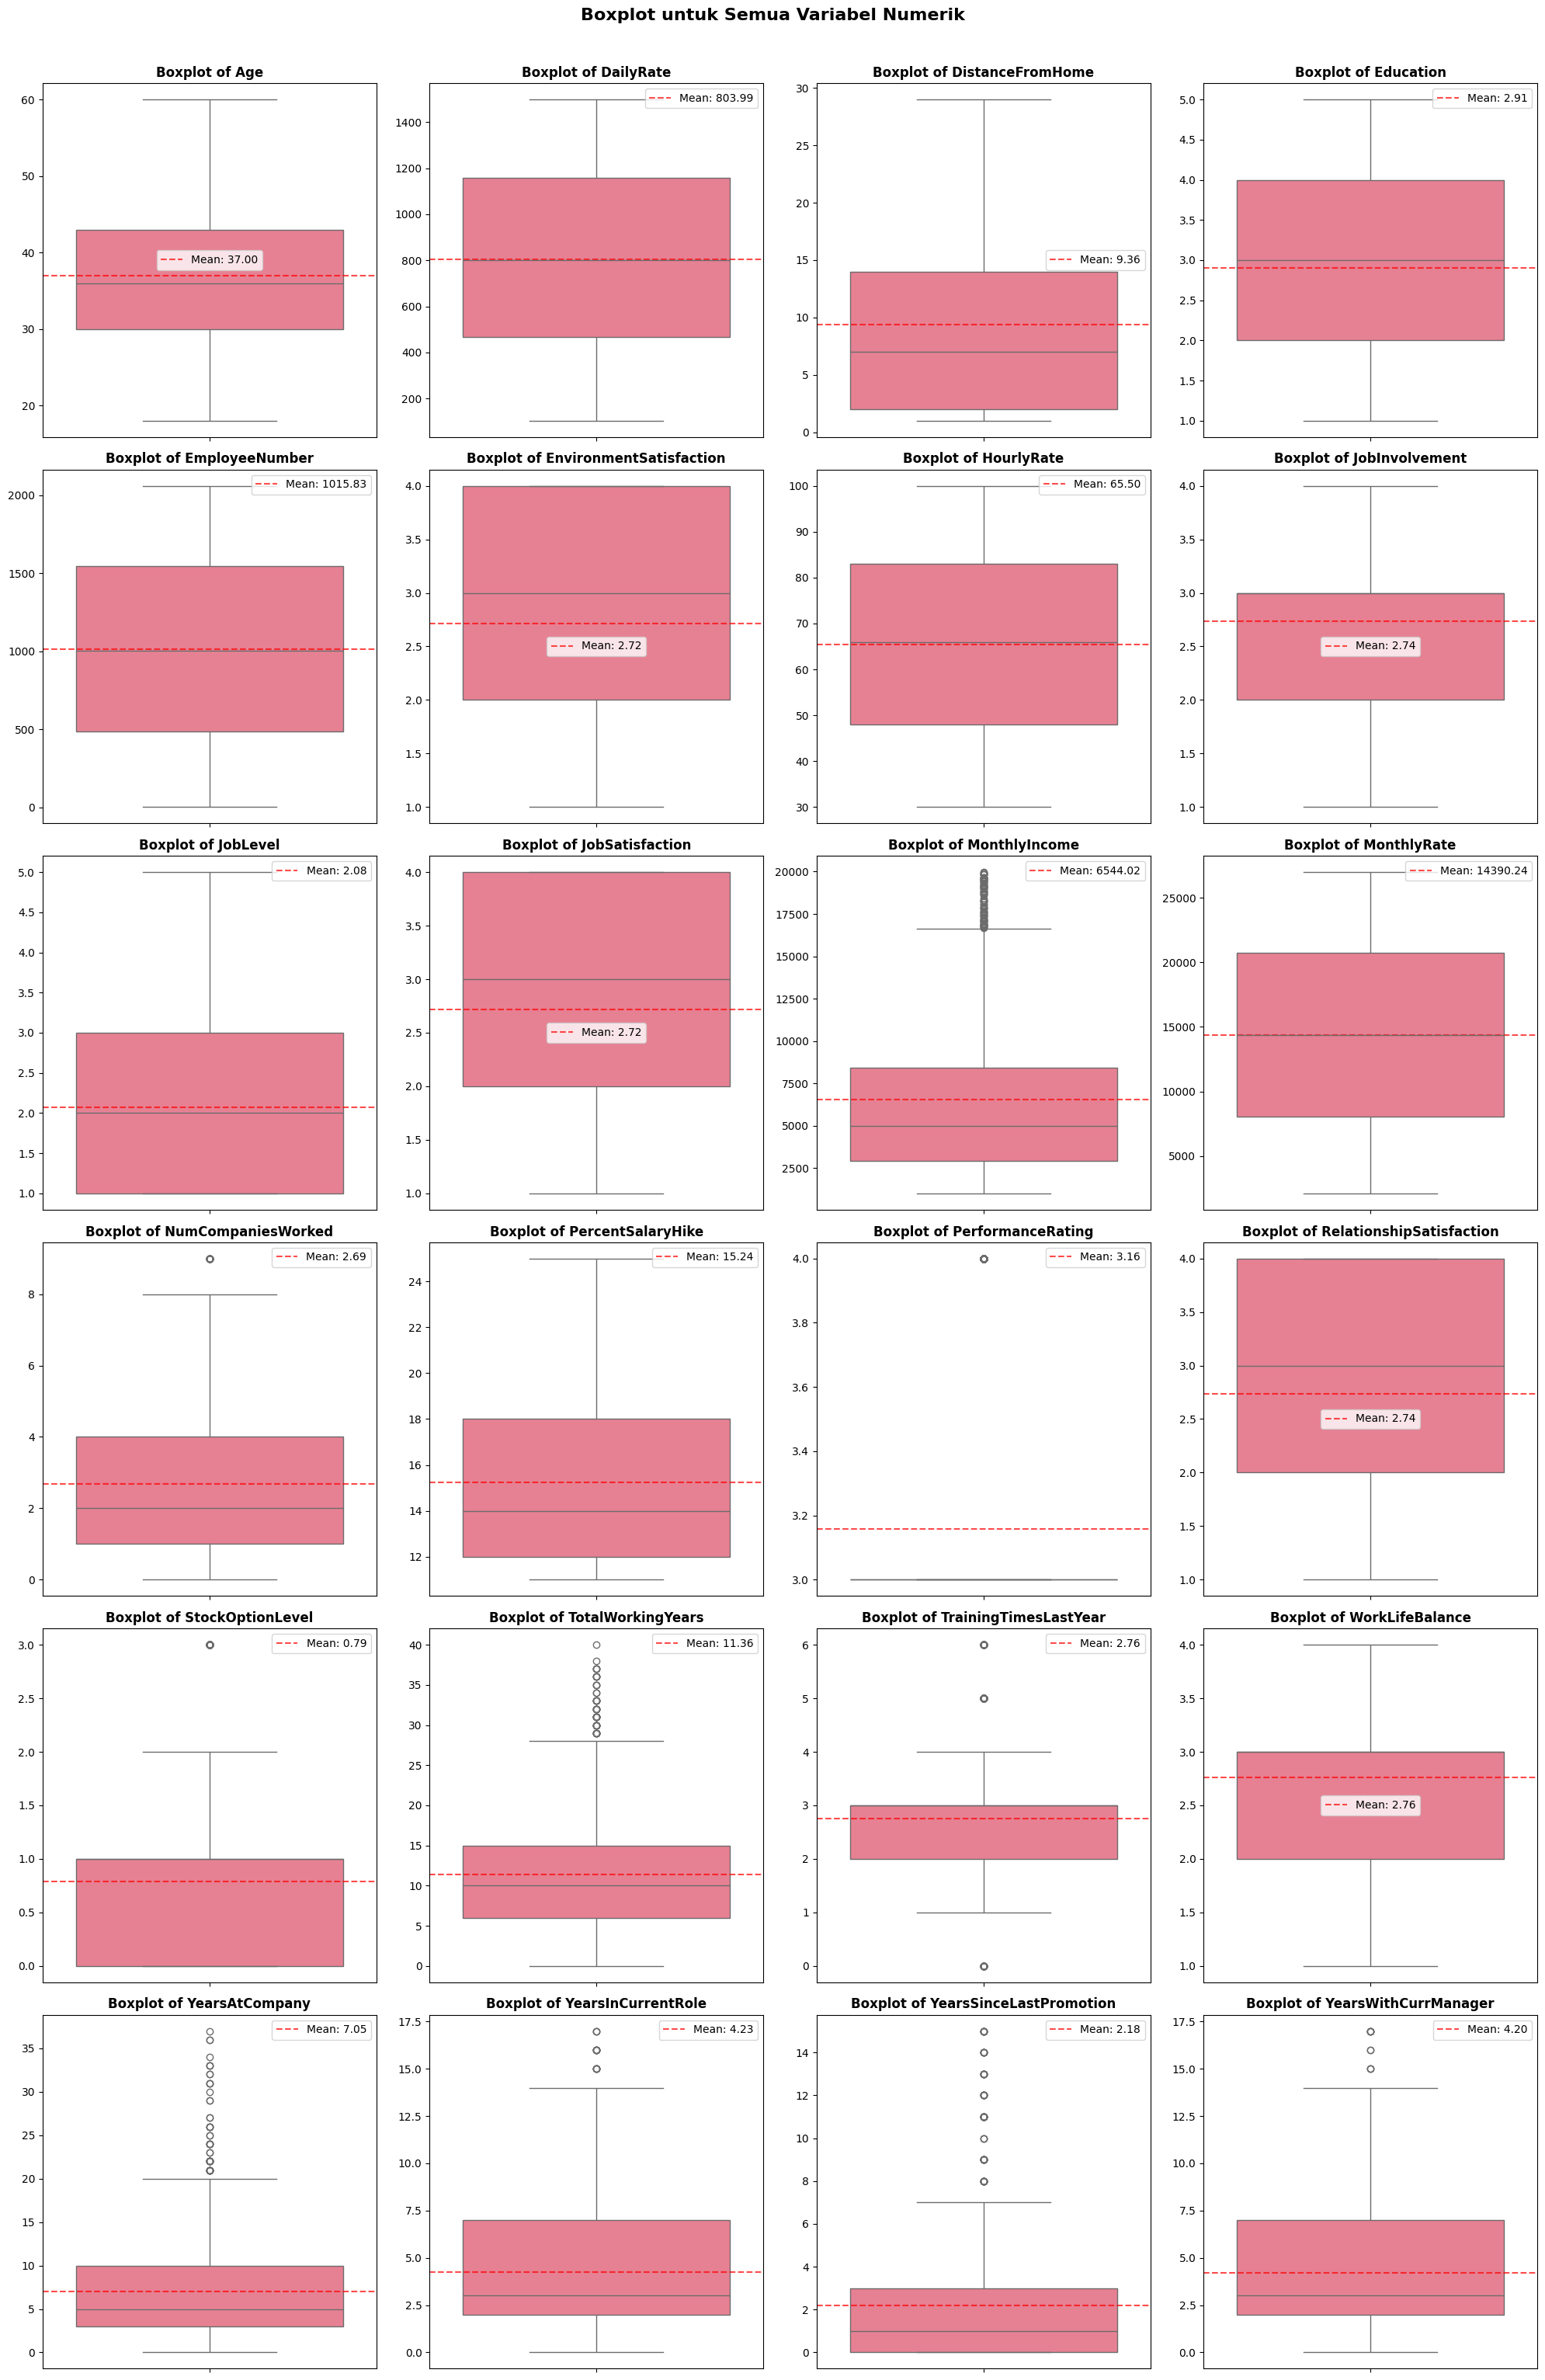

In [77]:

# Set style
plt.style.use('default')
sns.set_palette("husl")

# Get numeric columns
numeric_cols = train.select_dtypes(include=[np.number]).columns
numeric_cols=numeric_cols.drop('StandardHours')
numeric_cols=numeric_cols.drop('EmployeeCount')
numeric_cols=numeric_cols.drop('Attrition')
# Calculate grid size
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

# Create boxplot for each numeric column
for i, col in enumerate(numeric_cols):
    if i < len(axes):
        sns.boxplot(y=train[col], ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}', fontsize=12, fontweight='bold')
        axes[i].set_ylabel('')
        
        # Add mean line
        mean_val = train[col].mean()
        axes[i].axhline(y=mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
        axes[i].legend()

# Hide empty subplots
for j in range(len(numeric_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Boxplot untuk Semua Variabel Numerik', fontsize=16, fontweight='bold', y=1.02)
plt.show()

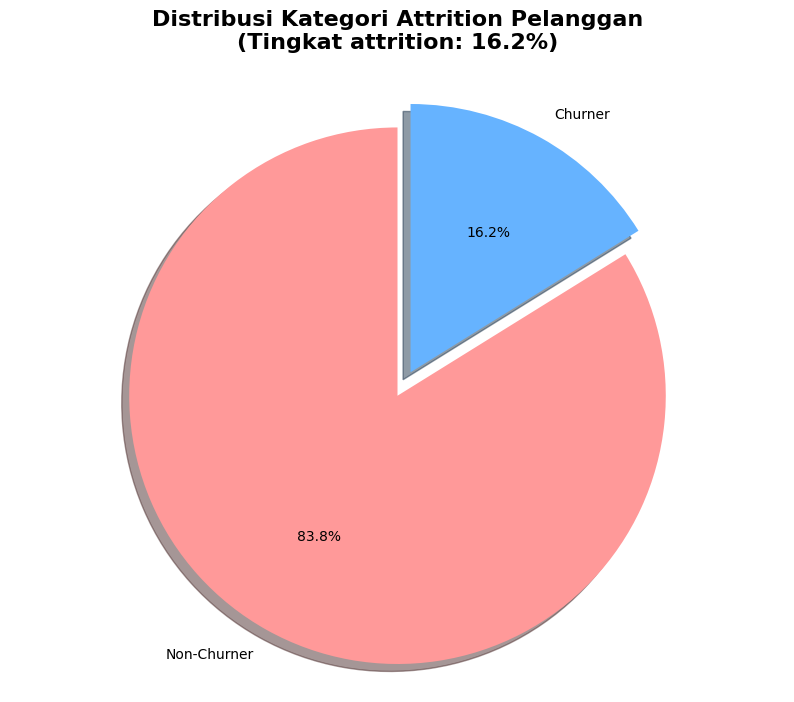

In [78]:

# Hitung persentase attrition
attrition_counts = train['Attrition'].value_counts()
attrition_percentages = (attrition_counts / len(train) * 100).round(1)

# Create pie chart
plt.figure(figsize=(10, 8))
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode 1st slice

plt.pie(attrition_counts, 
        labels=['Non-Churner', 'Churner'], 
        autopct='%1.1f%%',
        colors=colors,
        explode=explode,
        startangle=90,
        shadow=True)

plt.title('Distribusi Kategori Attrition Pelanggan\n(Tingkat attrition: {}%)'.format(attrition_percentages[1]), 
          fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

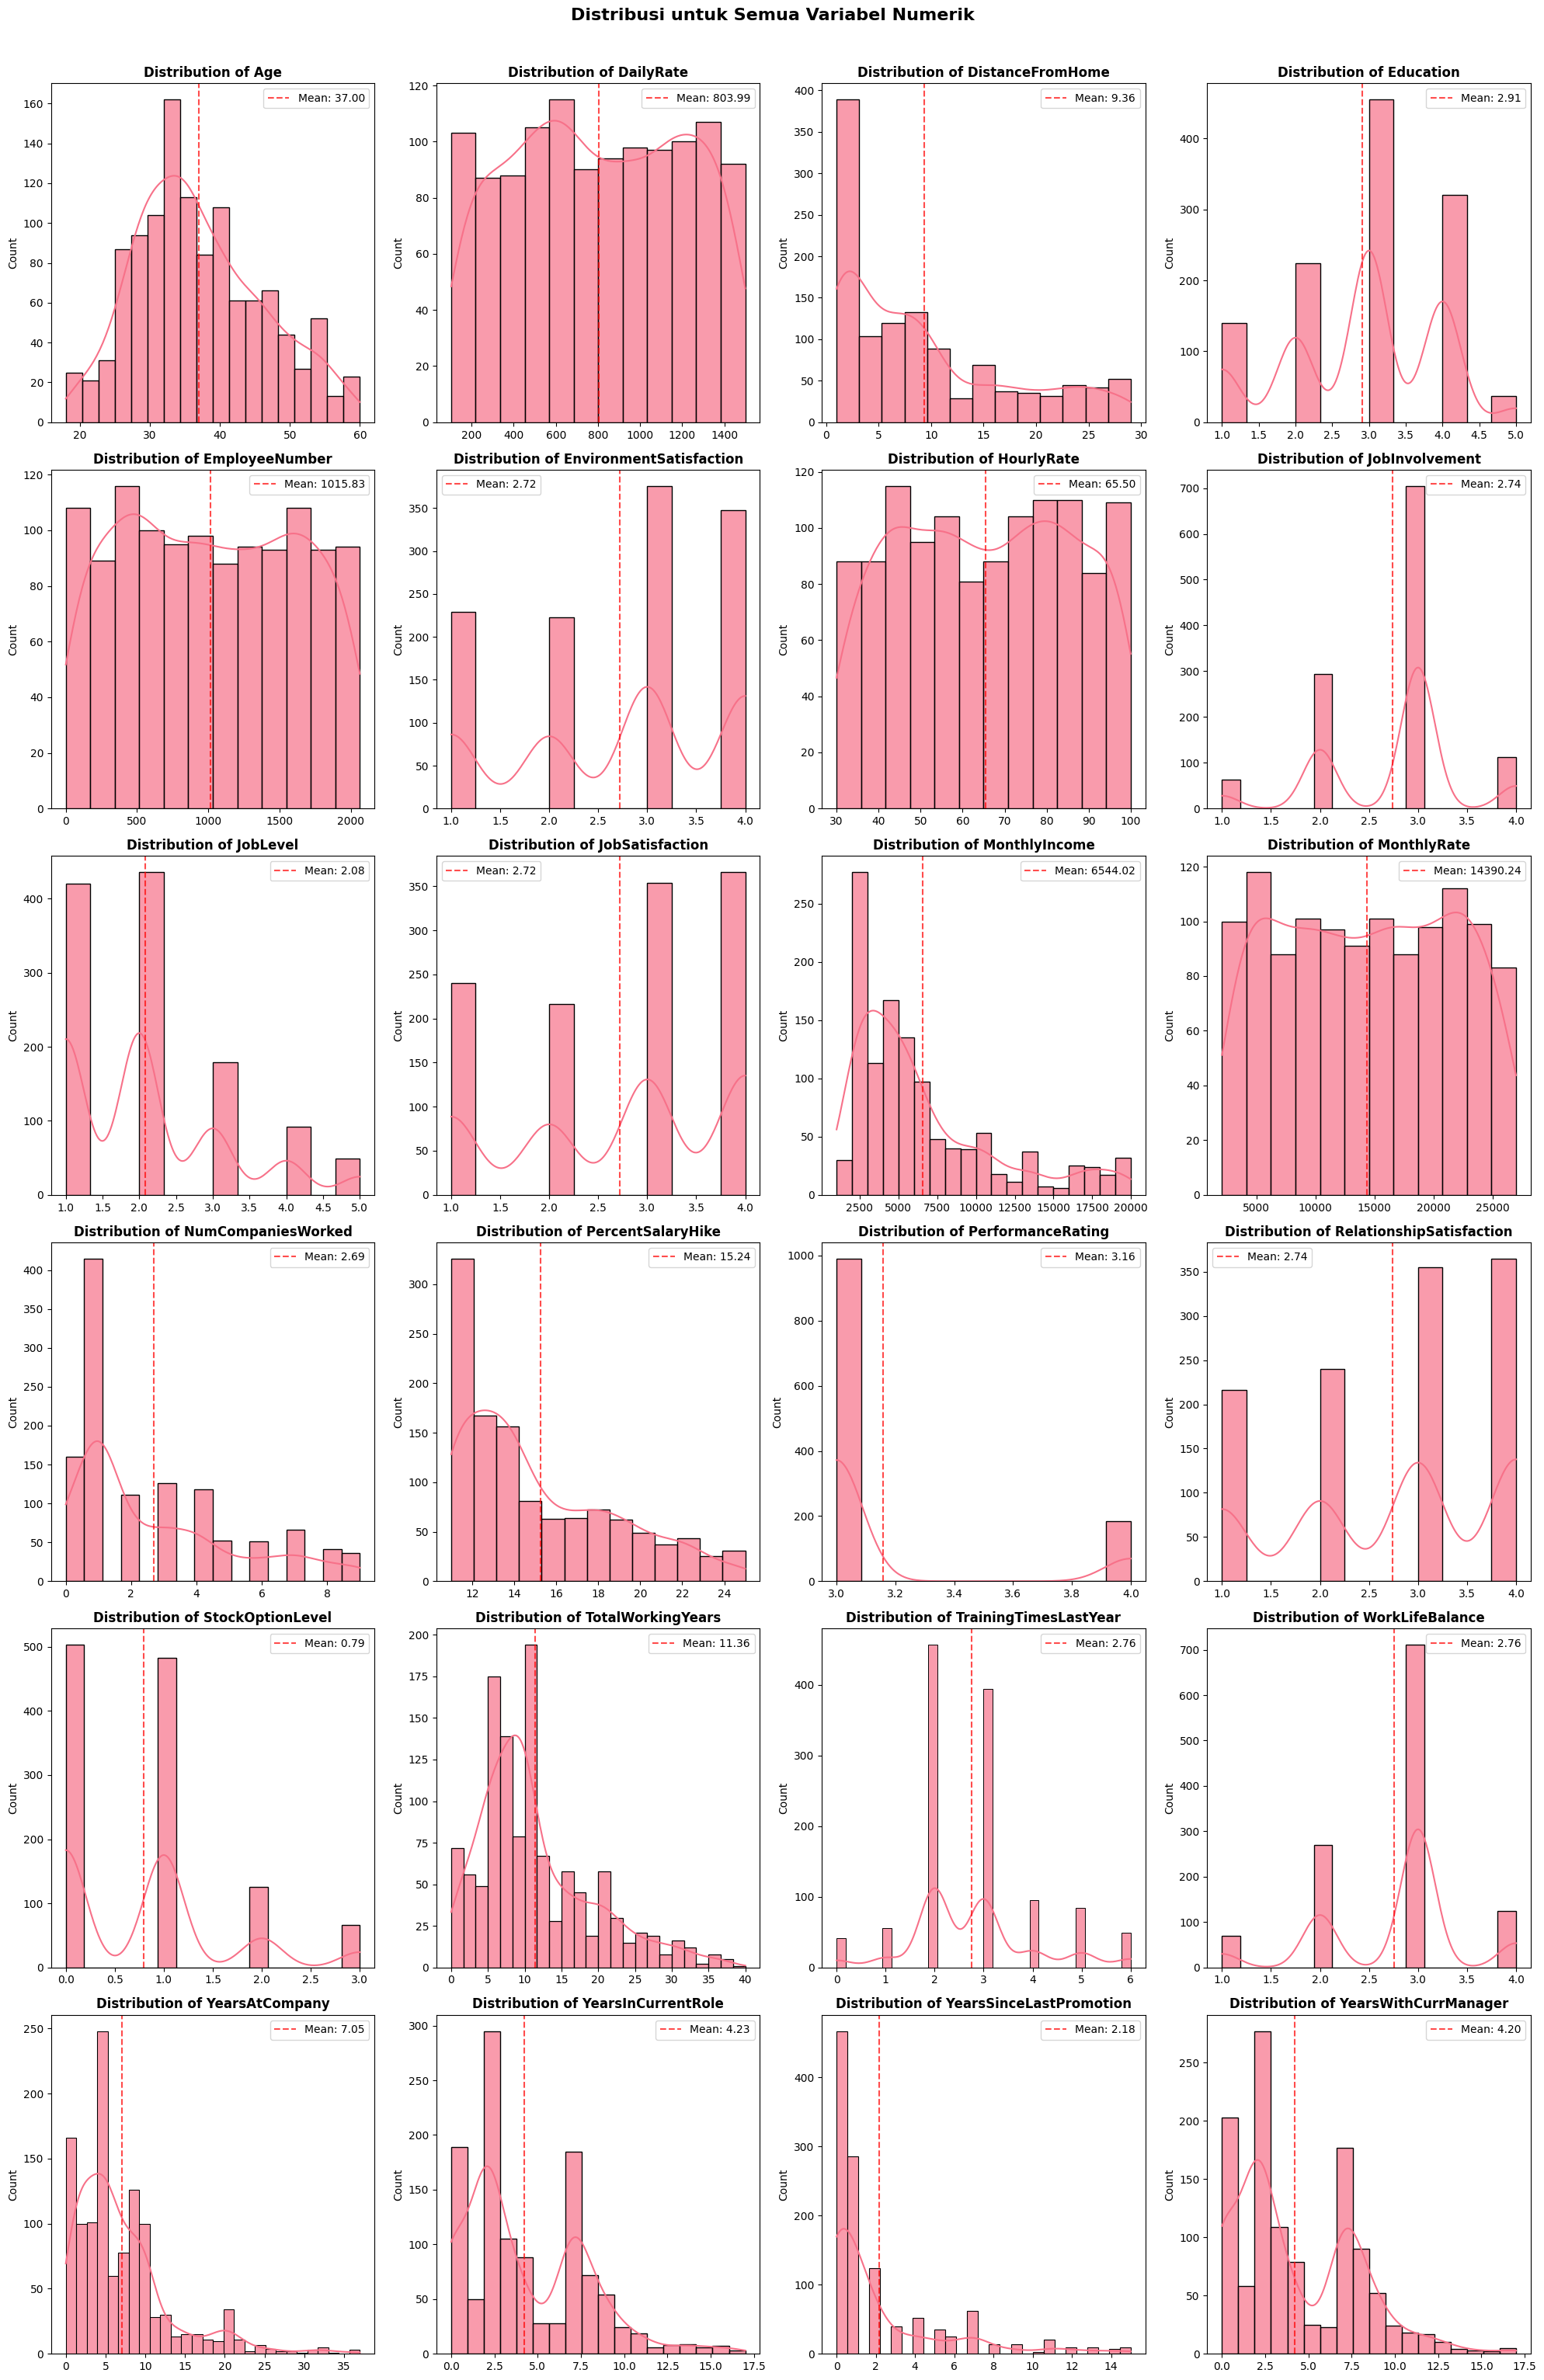

In [79]:

# Set style
plt.style.use('default')
sns.set_palette("husl")

# Get numeric columns and remove constant columns
numeric_cols = train.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop(['StandardHours', 'EmployeeCount', 'Attrition'])

# Calculate grid size
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

# Create histogram for each numeric column
for i, col in enumerate(numeric_cols):
    if i < len(axes):
        sns.histplot(data=train, x=col, ax=axes[i], kde=True, alpha=0.7)
        axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('')
        
        # Add mean line
        mean_val = train[col].mean()
        axes[i].axvline(x=mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
        axes[i].legend()

# Hide empty subplots
for j in range(len(numeric_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Distribusi untuk Semua Variabel Numerik', fontsize=16, fontweight='bold', y=1.02)
plt.show()

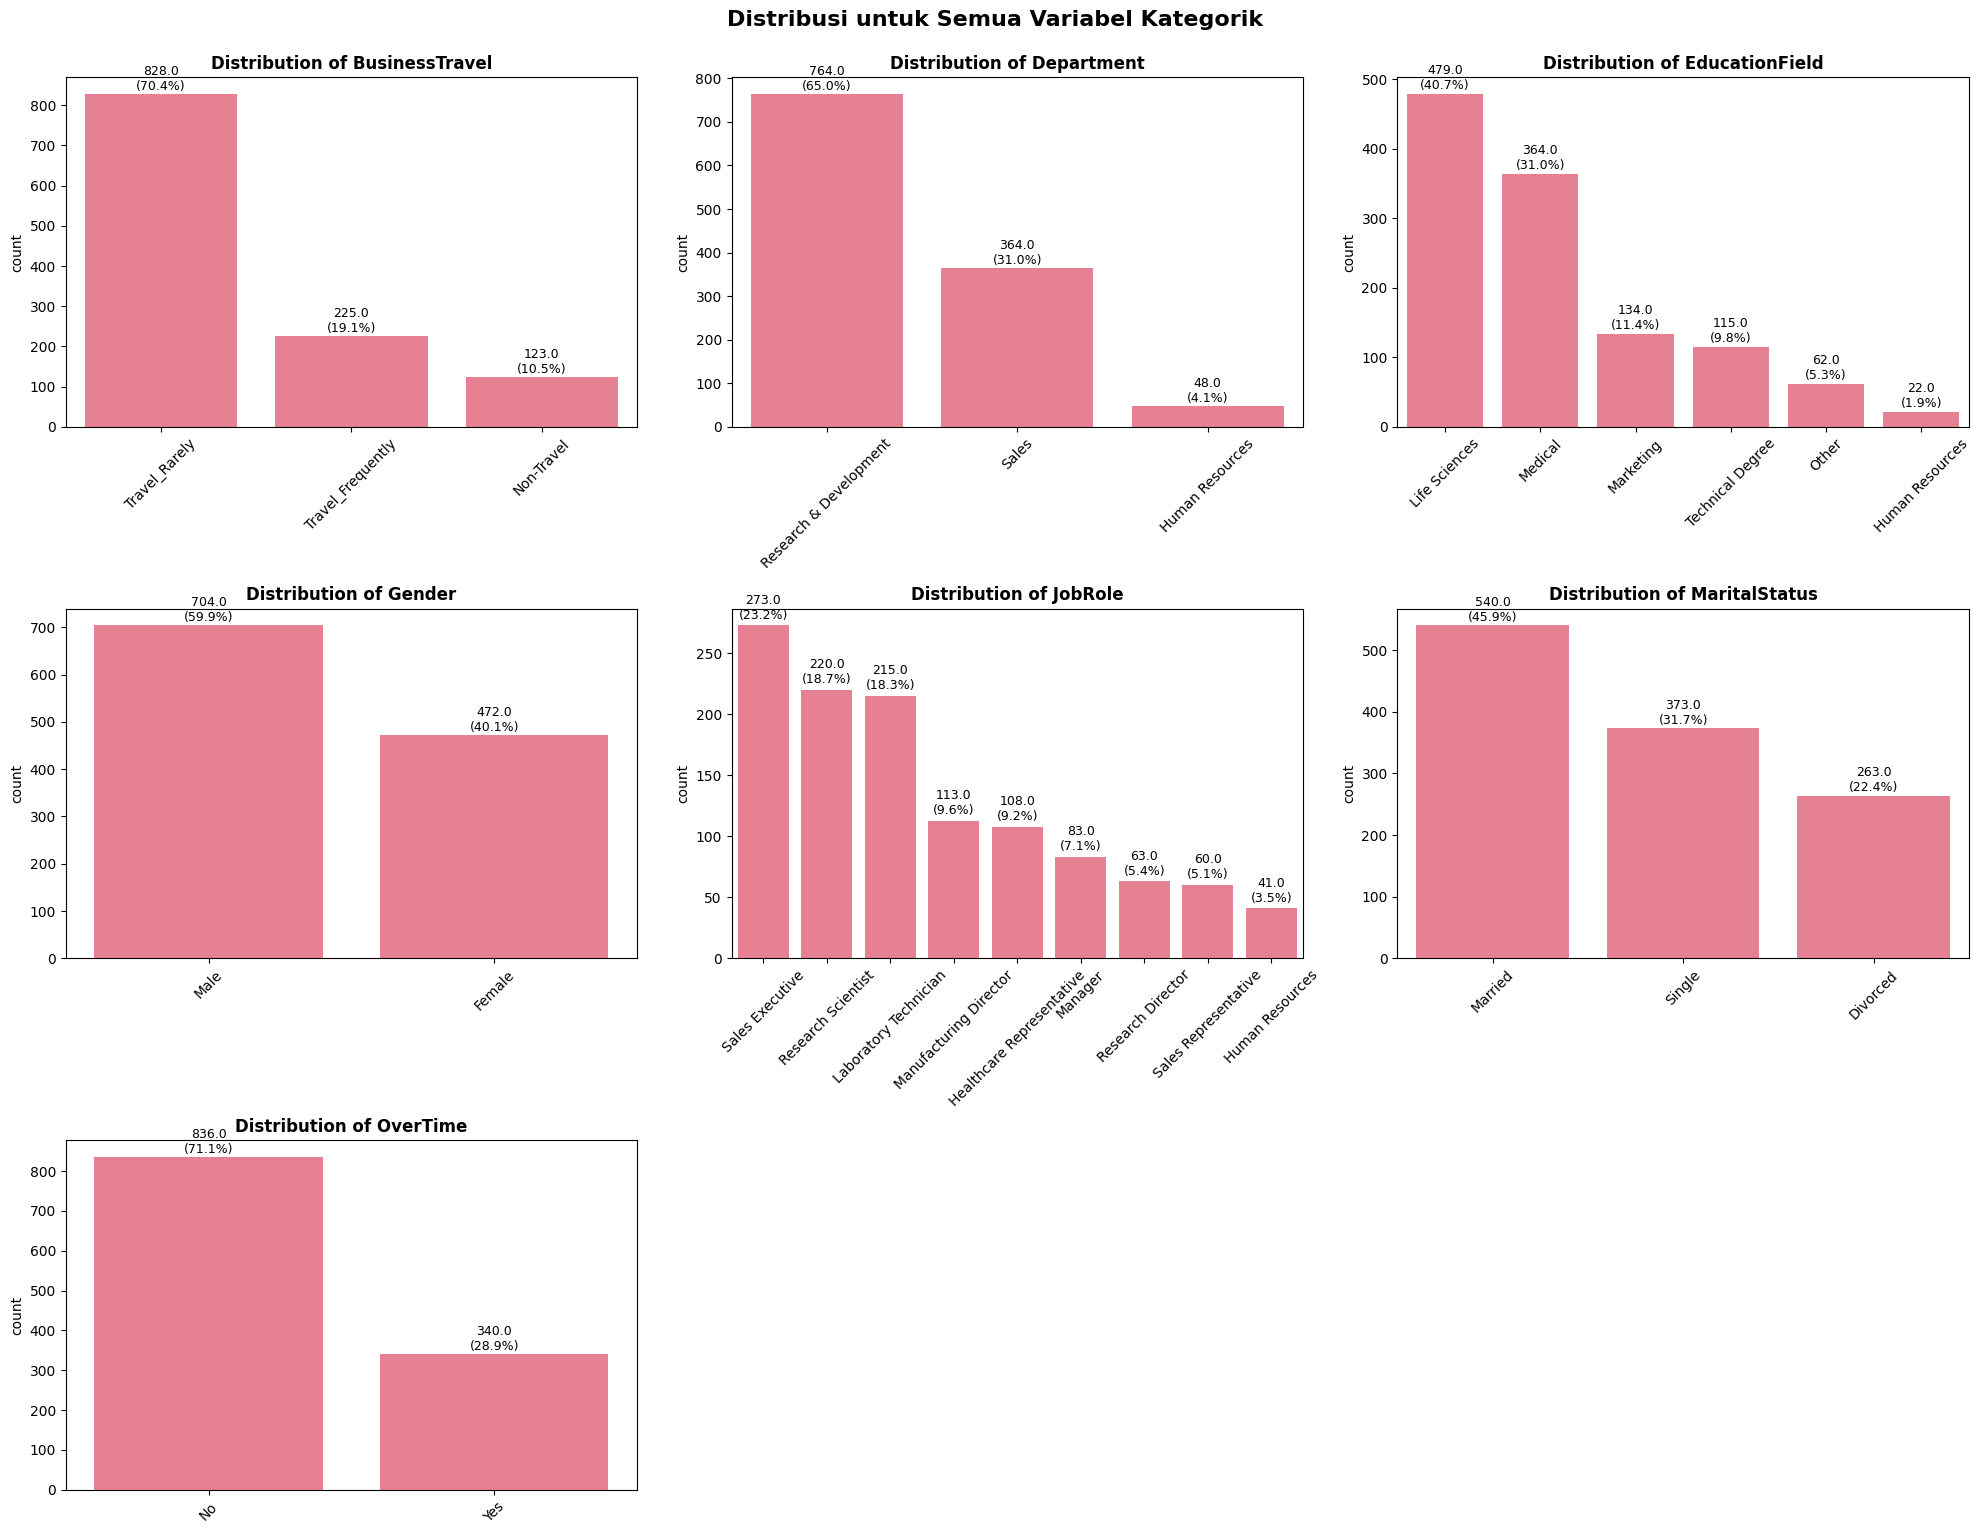

In [80]:

# Set style
plt.style.use('default')
sns.set_palette("husl")

# Get categorical columns
categorical_cols = train.select_dtypes(include=['object', 'category']).columns
categorical_cols=categorical_cols.drop('id')
categorical_cols=categorical_cols.drop('Over18')

# Calculate grid size
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

# Create countplot for each categorical column
for i, col in enumerate(categorical_cols):
    if i < len(axes):
        # Get value counts and sort
        value_counts = train[col].value_counts()
        
        # Create bar plot
        sns.countplot(data=train, x=col, ax=axes[i], order=value_counts.index)
        axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Add percentage labels
        total = len(train[col])
        for p in axes[i].patches:
            height = p.get_height()
            axes[i].text(p.get_x() + p.get_width()/2., height + 3,
                        f'{height}\n({height/total*100:.1f}%)',
                        ha='center', va='bottom', fontsize=9)

# Hide empty subplots
for j in range(len(categorical_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Distribusi untuk Semua Variabel Kategorik', fontsize=16, fontweight='bold', y=1.02)
plt.show()

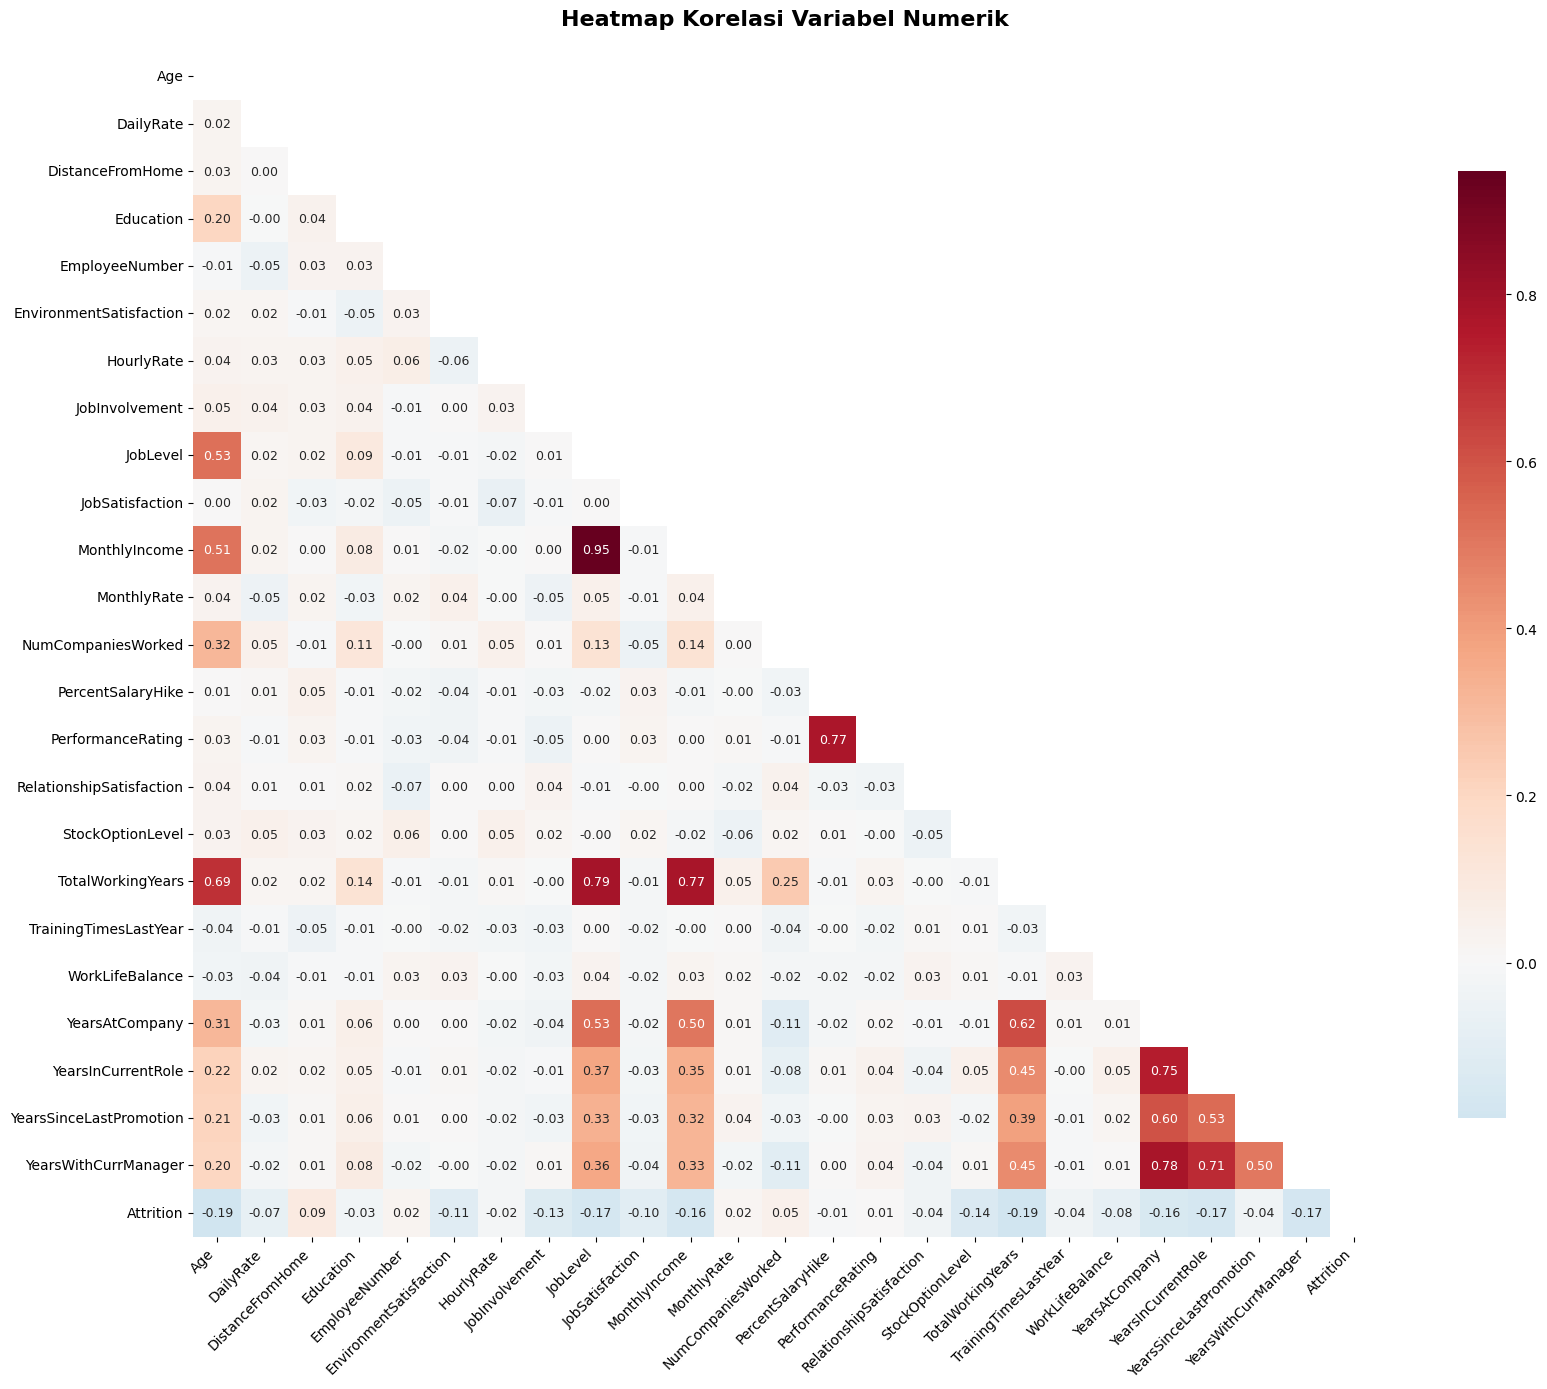

In [81]:

# Set style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 12)

# Get numeric columns and remove constant columns
numeric_cols = train.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop(['StandardHours', 'EmployeeCount'])

# Calculate correlation matrix
correlation_matrix = train[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(18, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle

heatmap = sns.heatmap(correlation_matrix, 
                      mask=mask,
                      annot=True, 
                      fmt='.2f', 
                      cmap='RdBu_r', 
                      center=0,
                      square=True, 
                      cbar_kws={'shrink': 0.8},
                      annot_kws={'size': 9})

plt.title('Heatmap Korelasi Variabel Numerik', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

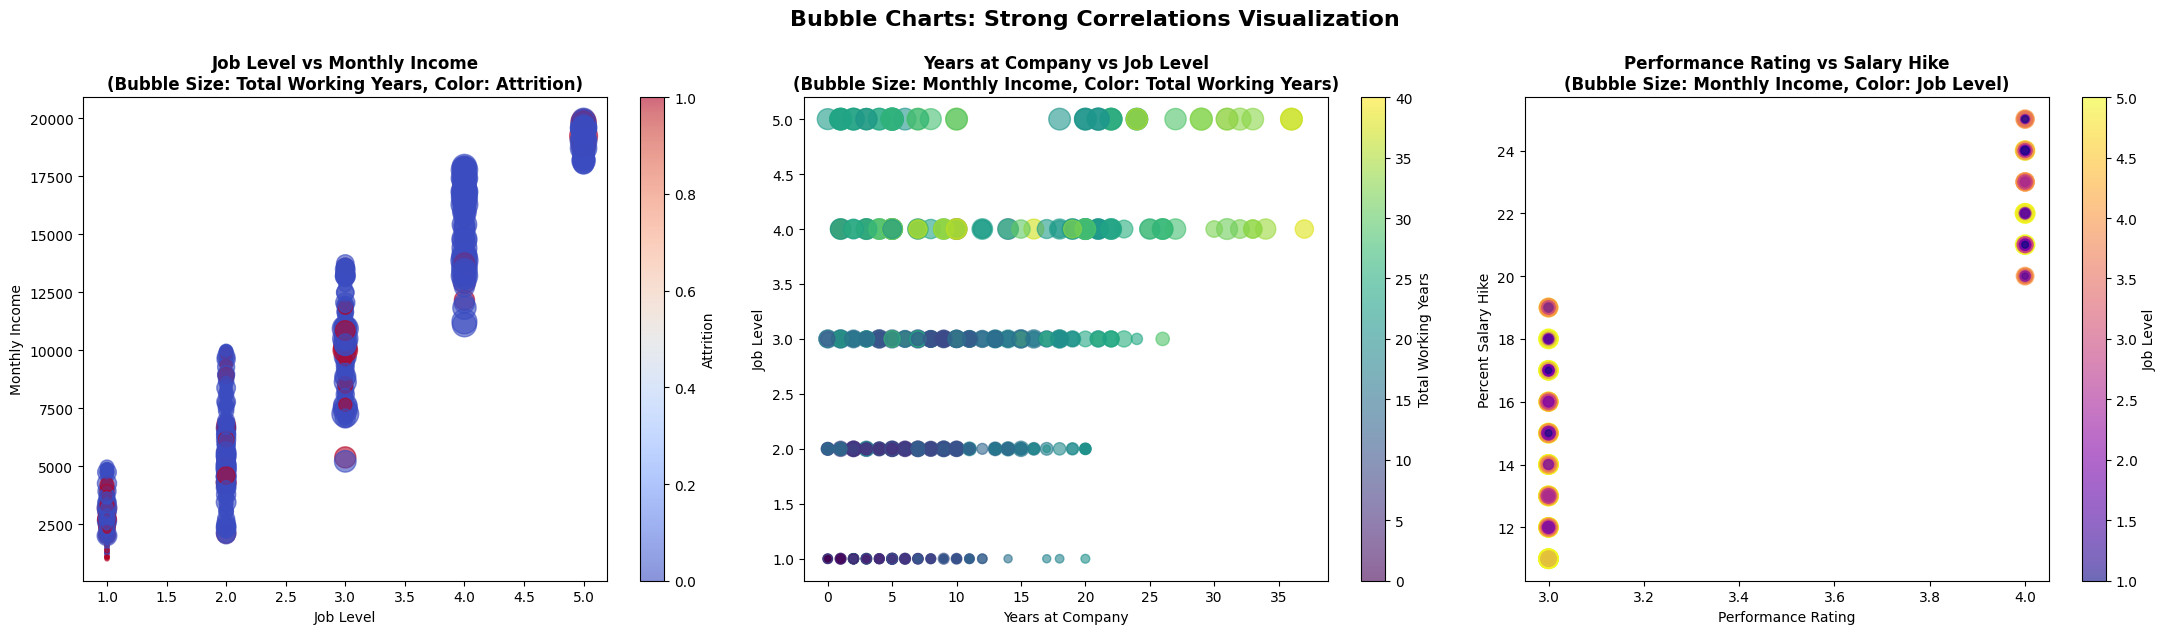

In [82]:

plt.style.use('default')
sns.set_palette("viridis")

# Buat figure
fig, axes = plt.subplots(1, 3, figsize=(22, 6))
axes = axes.flatten()

# === 1. JobLevel vs MonthlyIncome (Bubble Size: TotalWorkingYears, Color: Attrition) ===
scatter1 = axes[0].scatter(x=train['JobLevel'],
                           y=train['MonthlyIncome'],
                           s=train['TotalWorkingYears']*10,
                           c=train['Attrition'],
                           alpha=0.6,
                           cmap='coolwarm')
axes[0].set_xlabel('Job Level')
axes[0].set_ylabel('Monthly Income')
axes[0].set_title('Job Level vs Monthly Income\n(Bubble Size: Total Working Years, Color: Attrition)', fontweight='bold')
plt.colorbar(scatter1, ax=axes[0], label='Attrition')

# === 2. YearsAtCompany vs JobLevel (Bubble Size: MonthlyIncome, Color: TotalWorkingYears) ===
scatter2 = axes[1].scatter(x=train['YearsAtCompany'],
                           y=train['JobLevel'],
                           s=train['MonthlyIncome']/80,
                           c=train['TotalWorkingYears'],
                           alpha=0.6,
                           cmap='viridis')
axes[1].set_xlabel('Years at Company')
axes[1].set_ylabel('Job Level')
axes[1].set_title('Years at Company vs Job Level\n(Bubble Size: Monthly Income, Color: Total Working Years)', fontweight='bold')
plt.colorbar(scatter2, ax=axes[1], label='Total Working Years')

# === 3. PerformanceRating vs PercentSalaryHike (Bubble Size: MonthlyIncome, Color: JobLevel) ===
scatter3 = axes[2].scatter(x=train['PerformanceRating'],
                           y=train['PercentSalaryHike'],
                           s=train['MonthlyIncome']/100,
                           c=train['JobLevel'],
                           alpha=0.6,
                           cmap='plasma')
axes[2].set_xlabel('Performance Rating')
axes[2].set_ylabel('Percent Salary Hike')
axes[2].set_title('Performance Rating vs Salary Hike\n(Bubble Size: Monthly Income, Color: Job Level)', fontweight='bold')
plt.colorbar(scatter3, ax=axes[2], label='Job Level')

# Tata letak
plt.tight_layout()
plt.suptitle('Bubble Charts: Strong Correlations Visualization', fontsize=16, fontweight='bold', y=1.05)
plt.show()


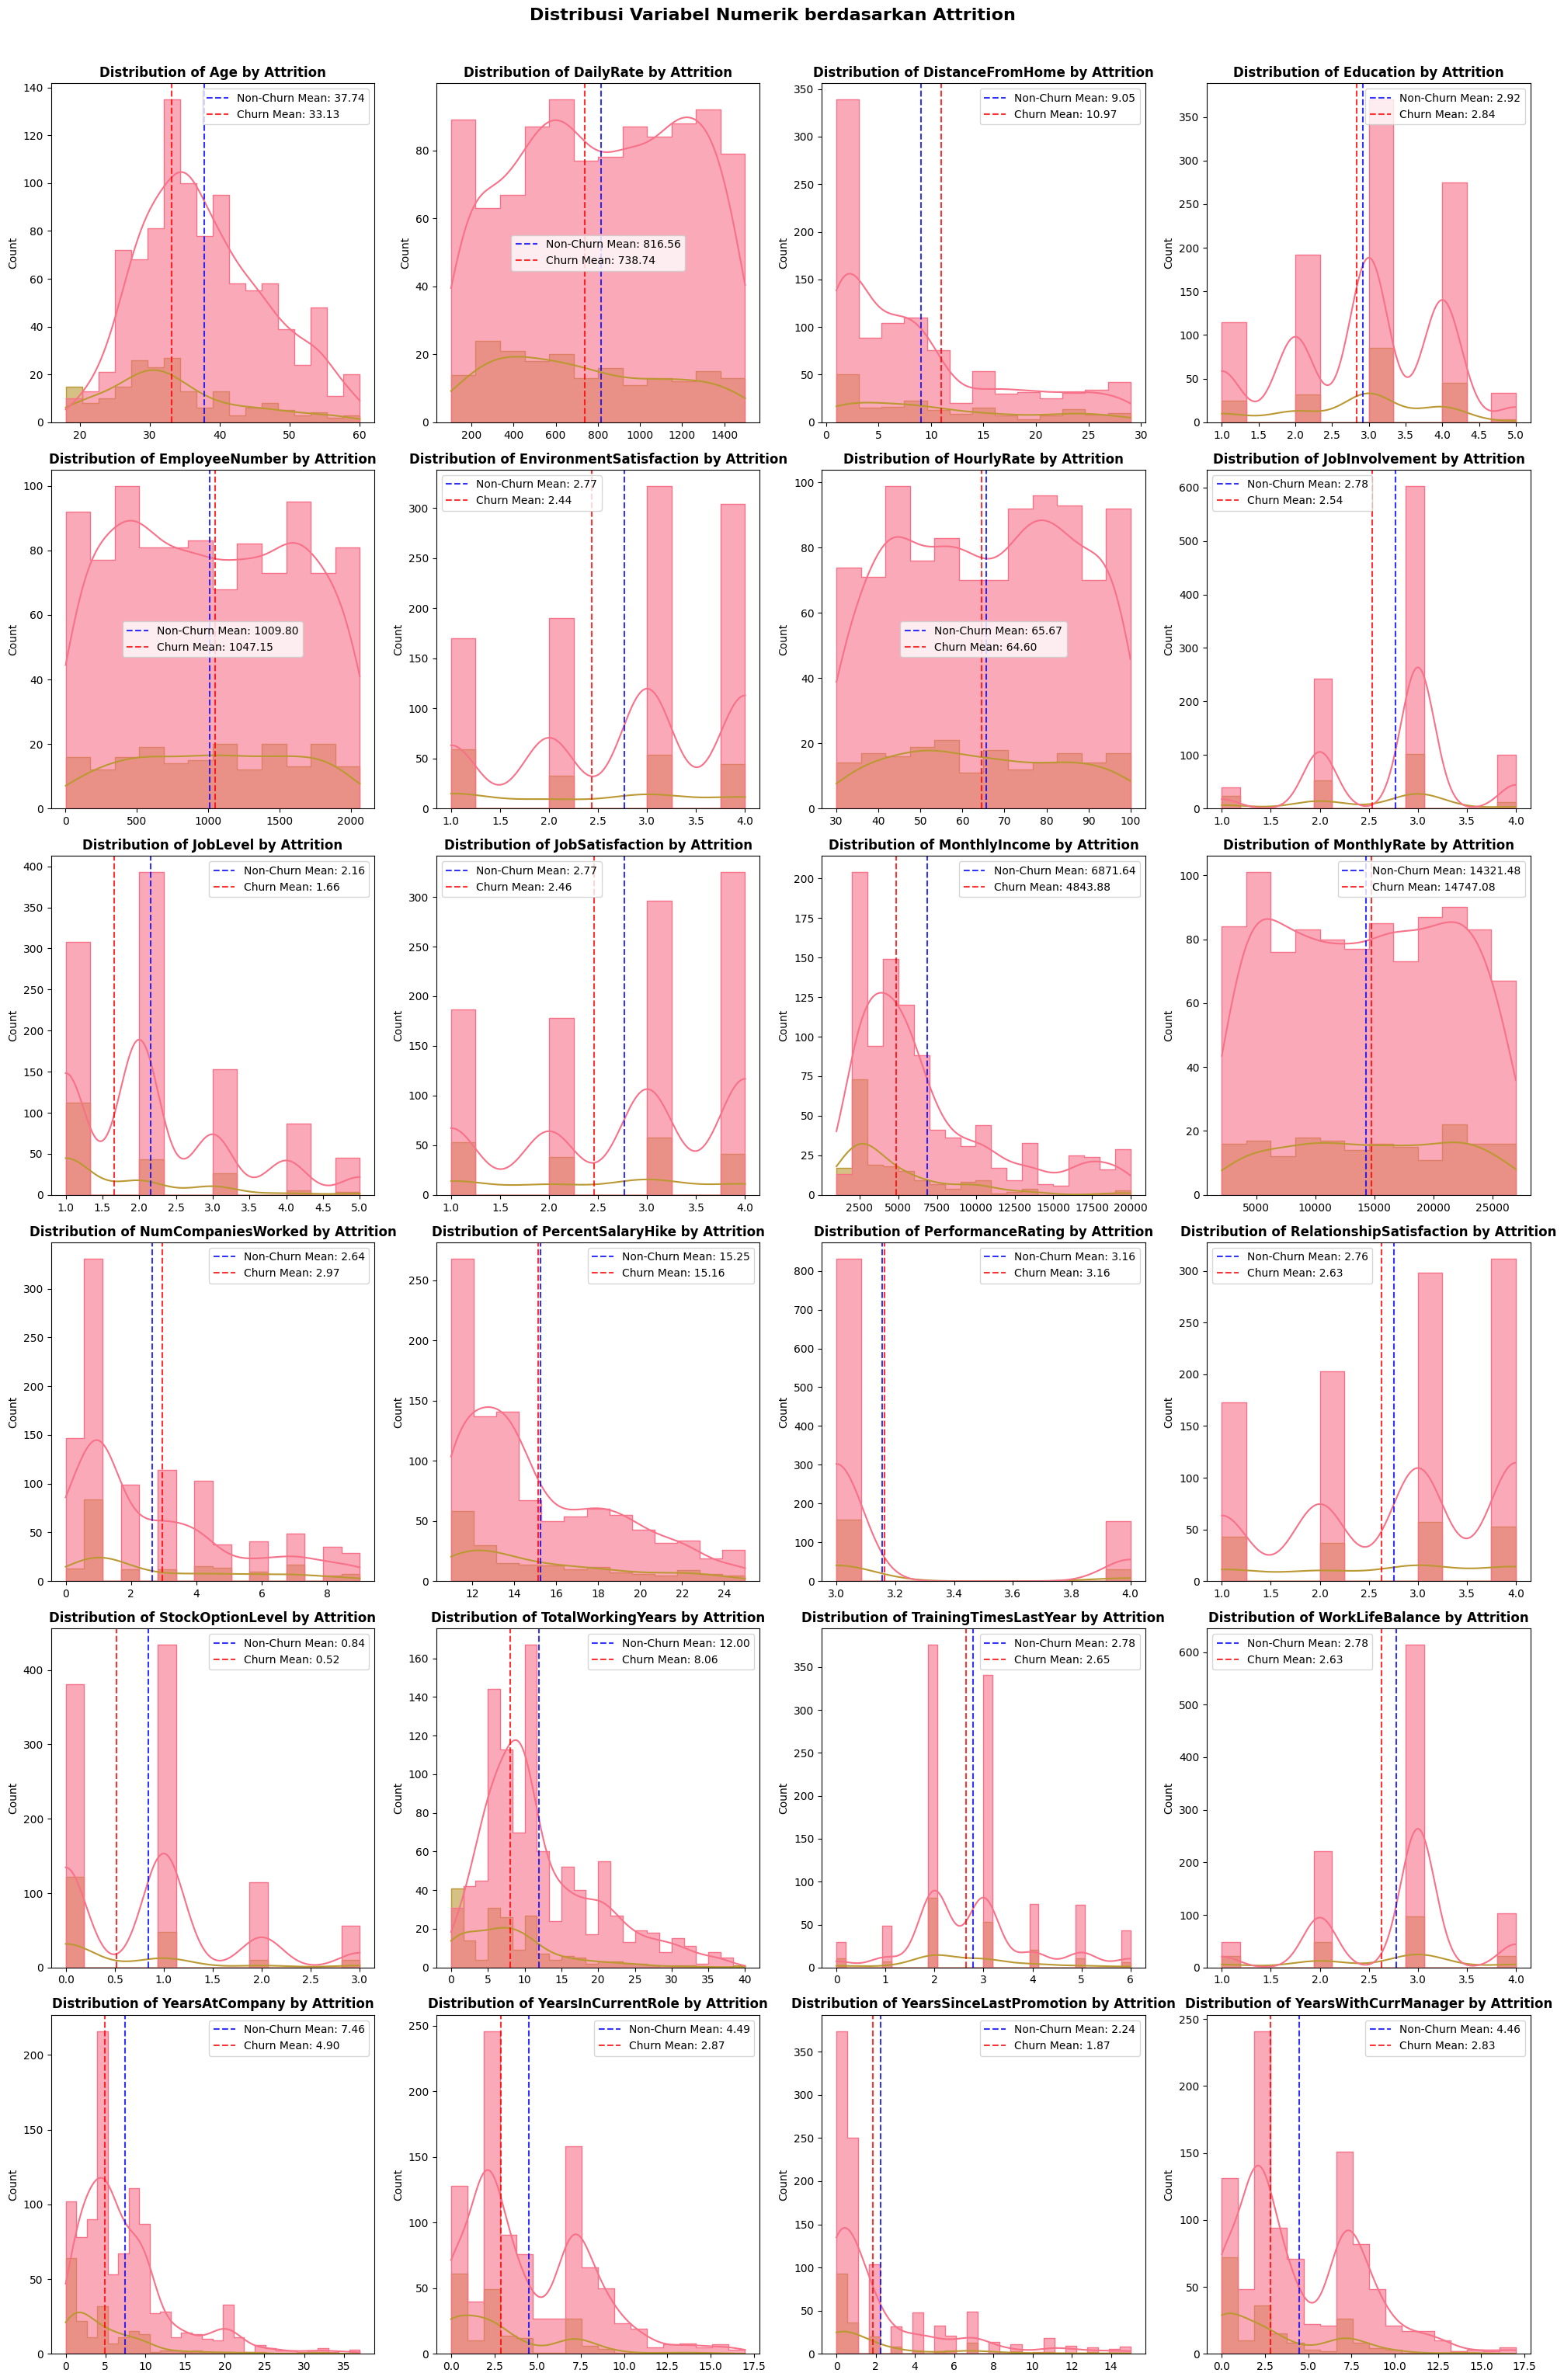

In [83]:

# Set style
plt.style.use('default')
sns.set_palette("husl")

# Get numeric columns and remove constant columns
numeric_cols = train.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop(['StandardHours', 'EmployeeCount', 'Attrition'])

# Calculate grid size
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

# Create distribution plot for each numeric column with Attrition
for i, col in enumerate(numeric_cols):
    if i < len(axes):
        # Create histogram with KDE for each Attrition group
        sns.histplot(data=train, x=col, hue='Attrition', ax=axes[i], 
                    kde=True, alpha=0.6, element='step', common_norm=False)
        axes[i].set_title(f'Distribution of {col} by Attrition', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('')
        
        # Add mean lines for each group
        mean_0 = train[train['Attrition'] == 0][col].mean()
        mean_1 = train[train['Attrition'] == 1][col].mean()
        
        axes[i].axvline(x=mean_0, color='blue', linestyle='--', alpha=0.8, label=f'Non-Churn Mean: {mean_0:.2f}')
        axes[i].axvline(x=mean_1, color='red', linestyle='--', alpha=0.8, label=f'Churn Mean: {mean_1:.2f}')
        axes[i].legend()

# Hide empty subplots
for j in range(len(numeric_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Distribusi Variabel Numerik berdasarkan Attrition', fontsize=16, fontweight='bold', y=1.02)
plt.show()

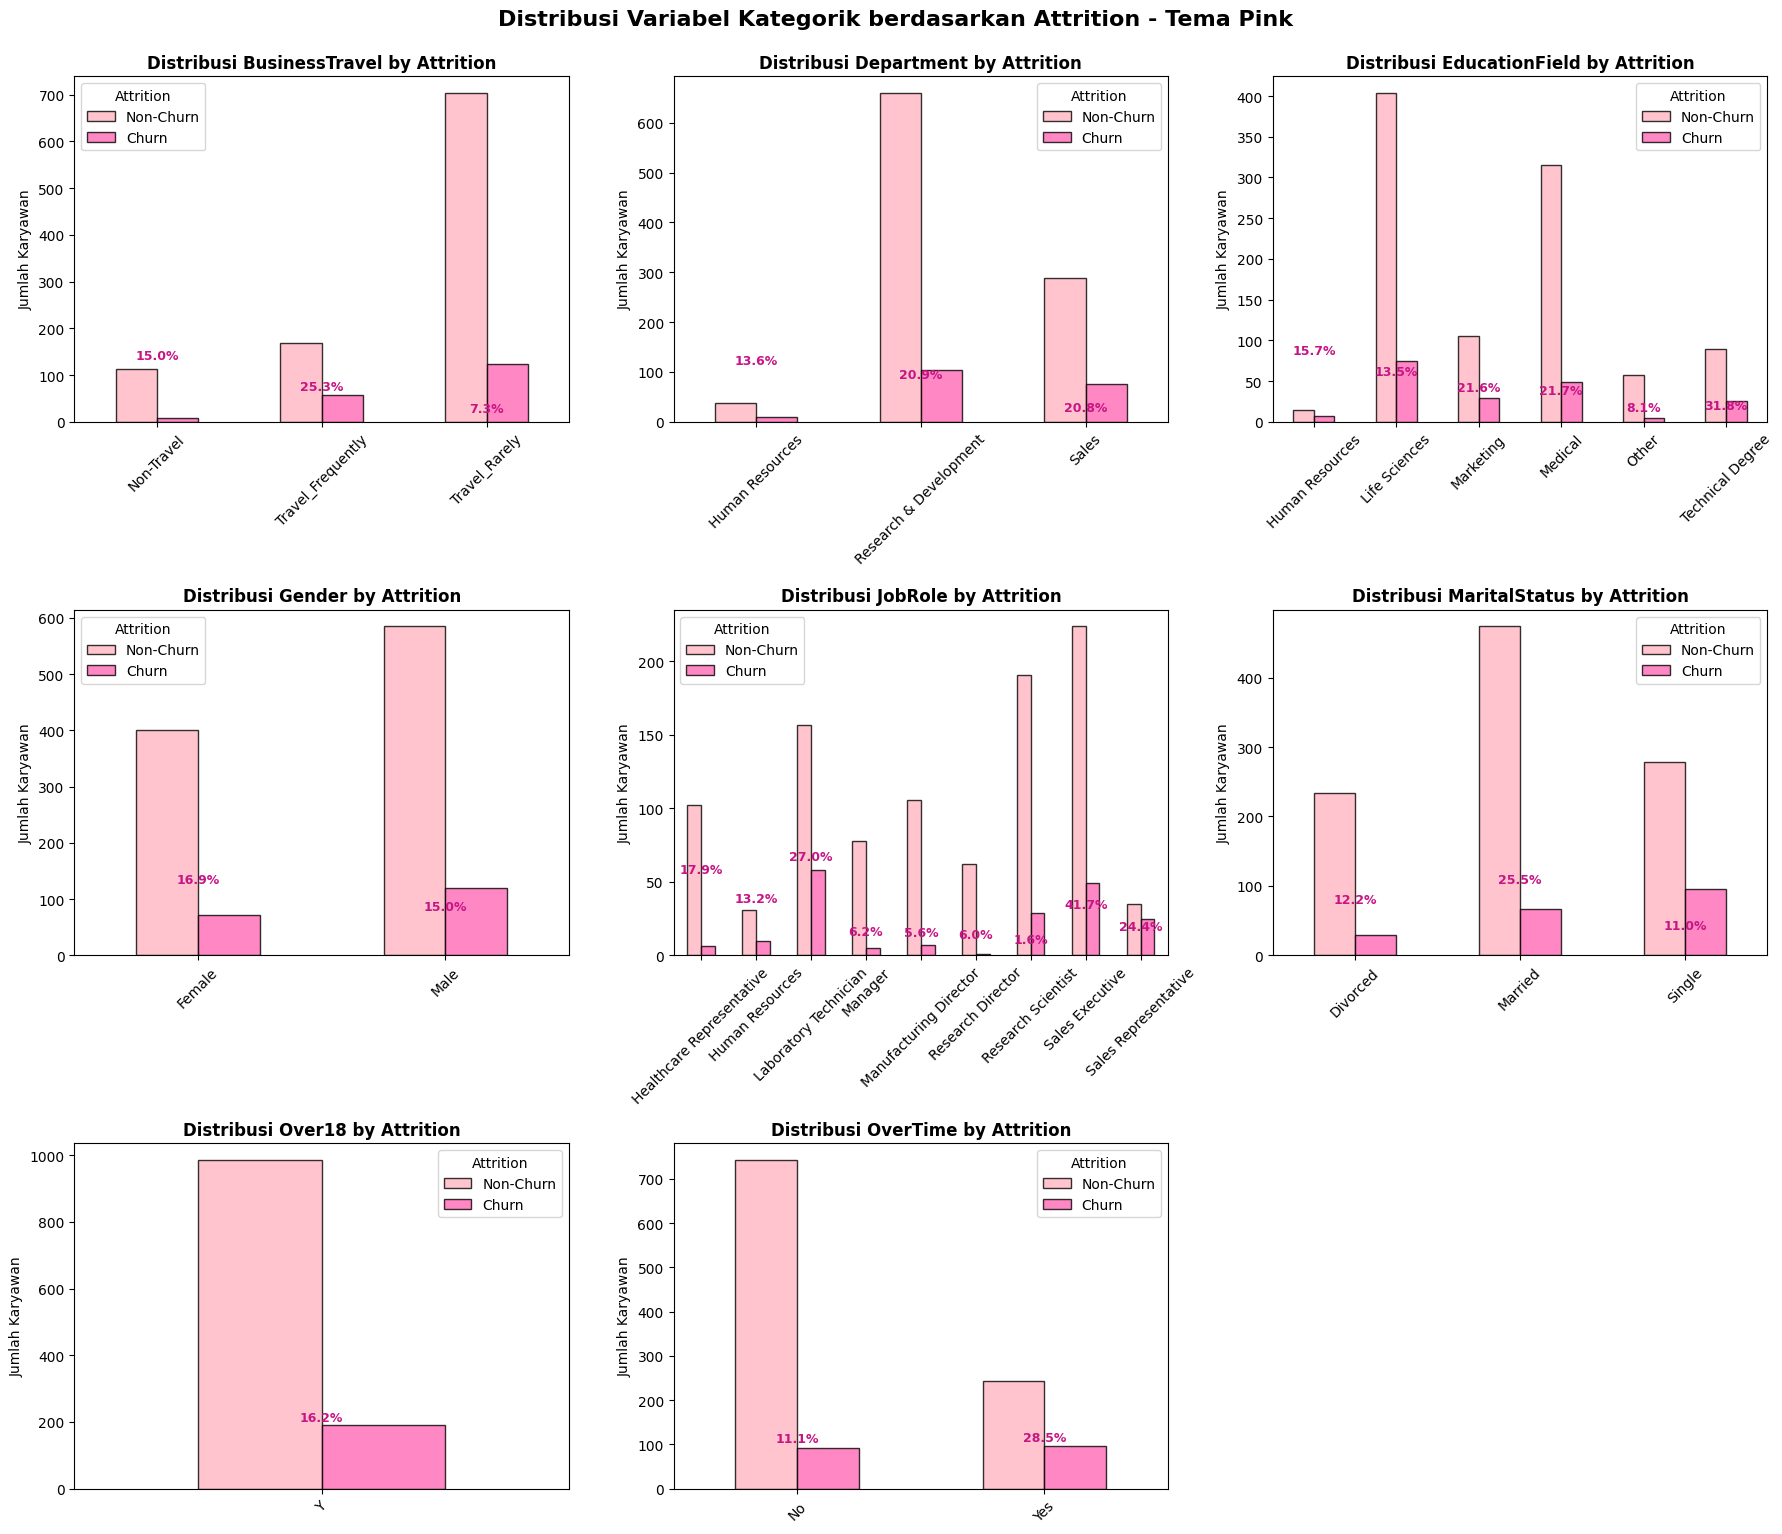

In [84]:

# Set style dengan tema pink
plt.style.use('default')
sns.set_palette(["#FF69B4", "#FFB6C1"])  # Pink color palette

# Get categorical columns
categorical_cols = train.select_dtypes(include=['object', 'category']).columns
categorical_cols =categorical_cols .drop('id')
# Calculate grid size
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

# Create countplot for each categorical column dengan Attrition
for i, col in enumerate(categorical_cols):
    if i < len(axes):
        # Create stacked bar plot
        pd.crosstab(train[col], train['Attrition']).plot(kind='bar', 
                                                        ax=axes[i], 
                                                        color=['#FFB6C1', '#FF69B4'],
                                                        alpha=0.8,
                                                        edgecolor='black')
        axes[i].set_title(f'Distribusi {col} by Attrition', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Jumlah Karyawan')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend(['Non-Churn', 'Churn'], title='Attrition')
        
        # Add percentage labels untuk churn
        total_by_category = train[col].value_counts()
        churn_by_category = train[train['Attrition'] == 1][col].value_counts()
        
        for j, (category, total) in enumerate(total_by_category.items()):
            if category in churn_by_category:
                churn_count = churn_by_category[category]
                churn_percentage = (churn_count / total) * 100
                axes[i].text(j, churn_count + 5, f'{churn_percentage:.1f}%', 
                           ha='center', va='bottom', fontsize=9, fontweight='bold', color='#C71585')

# Hide empty subplots
for j in range(len(categorical_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Distribusi Variabel Kategorik berdasarkan Attrition - Tema Pink', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

## **4. Preprocessing**

In [85]:
train.duplicated().sum()

np.int64(0)

<Axes: >

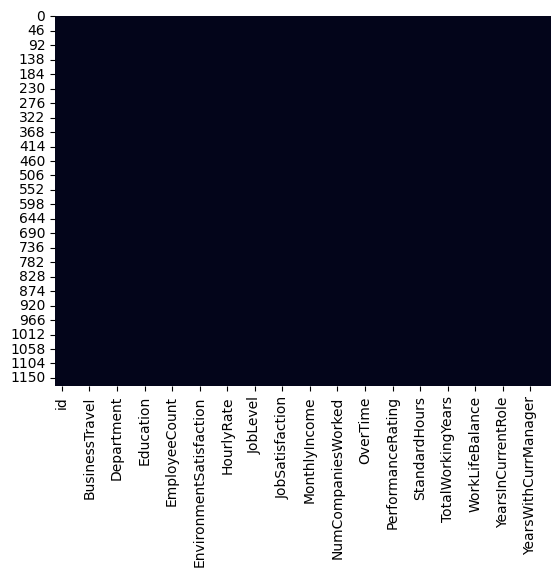

In [86]:
sns.heatmap(train.isna(), cbar = False)

## **5. Training**

### **a. Random Forest**

#### Preprocessing

In [87]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')
submission = pd.read_csv('../datasets/sample_submission.csv')

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1176 non-null   object
 1   Age                       1176 non-null   int64 
 2   BusinessTravel            1176 non-null   object
 3   DailyRate                 1176 non-null   int64 
 4   Department                1176 non-null   object
 5   DistanceFromHome          1176 non-null   int64 
 6   Education                 1176 non-null   int64 
 7   EducationField            1176 non-null   object
 8   EmployeeCount             1176 non-null   int64 
 9   EmployeeNumber            1176 non-null   int64 
 10  EnvironmentSatisfaction   1176 non-null   int64 
 11  Gender                    1176 non-null   object
 12  HourlyRate                1176 non-null   int64 
 13  JobInvolvement            1176 non-null   int64 
 14  JobLevel                

In [89]:
print(f"Data train duplikat:", train.duplicated().sum())
print(f"Data test duplikat:", test.duplicated().sum())

Data train duplikat: 0
Data test duplikat: 0


In [90]:
print(f"Data train duplikat pada kolom id:", train.duplicated(subset=['EmployeeNumber']).sum())


Data train duplikat pada kolom id: 0


In [91]:
print(f"Data train duplikat pada kolom id:", train.duplicated(subset=['id']).sum())
print(f"Data test duplikat pada kolom id:", test.duplicated(subset=['id']).sum())

Data train duplikat pada kolom id: 3
Data test duplikat pada kolom id: 0


In [92]:
duplikat_rows = train[train.duplicated(subset=['id'], keep=False)]
print(duplikat_rows)

         id  Age     BusinessTravel  DailyRate              Department  \
57    TP136   42      Travel_Rarely        462                   Sales   
212   BN287   33  Travel_Frequently        970                   Sales   
472   BN287   37         Non-Travel       1063  Research & Development   
569   WA862   34  Travel_Frequently        135  Research & Development   
677   TP136   40      Travel_Rarely        676  Research & Development   
1072  WA862   52      Travel_Rarely       1030                   Sales   

      DistanceFromHome  Education EducationField  EmployeeCount  \
57                  14          2        Medical              1   
212                  7          3  Life Sciences              1   
472                 25          5        Medical              1   
569                 19          3        Medical              1   
677                  9          4  Life Sciences              1   
1072                 5          3  Life Sciences              1   

      Emplo

In [93]:
train = train.drop_duplicates(subset=['id'], keep='first')

In [94]:
print(f"Data train duplikat pada kolom id:", train.duplicated(subset=['id']).sum())

Data train duplikat pada kolom id: 0


In [95]:
train.drop(columns=["id","EmployeeCount", "Over18", "StandardHours"], inplace=True)
test.drop(columns=["id","EmployeeCount", "Over18", "StandardHours"], inplace=True)

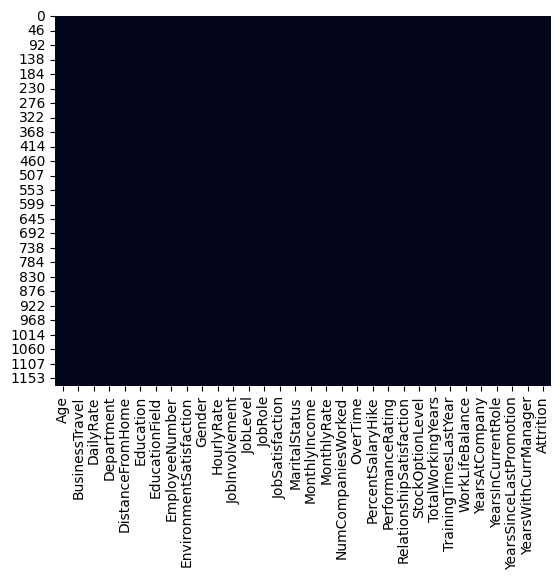

In [96]:
sns.heatmap(train.isnull(), cbar=False);

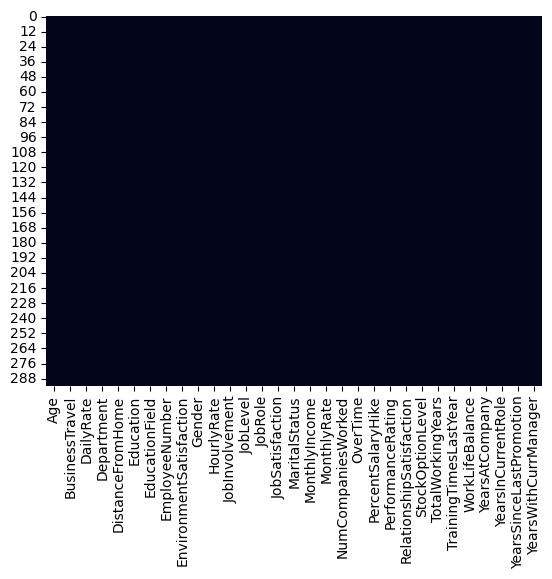

In [97]:
sns.heatmap(test.isnull(), cbar=False);

In [98]:
train.describe(include='all')

Age BusinessTravel    DailyRate              Department  \
count   1173.000000           1173  1173.000000                    1173   
unique          NaN              3          NaN                       3   
top             NaN  Travel_Rarely          NaN  Research & Development   
freq            NaN            826          NaN                     762   
mean      36.982950            NaN   803.687127                     NaN   
std        9.178996            NaN   401.709774                     NaN   
min       18.000000            NaN   103.000000                     NaN   
25%       30.000000            NaN   467.000000                     NaN   
50%       36.000000            NaN   798.000000                     NaN   
75%       43.000000            NaN  1157.000000                     NaN   
max       60.000000            NaN  1499.000000                     NaN   

        DistanceFromHome    Education EducationField  EmployeeNumber  \
count        1173.000000  1173.000000           1173     1173.000000   
unique               NaN          NaN              6             NaN   
top                  NaN          NaN  Life Sciences             NaN   
freq                 NaN          NaN            477             NaN   
mean            9.348679     2.903666            NaN     1015.545610   
std             8.176508     1.026988            NaN      599.999726   
min             1.000000     1.000000            NaN        1.000000   
25%             2.000000     2.000000            NaN      487.000000   
50%             7.000000     3.000000            NaN     1004.000000   
75%            14.000000     4.000000            NaN     1548.000000   
max            29.000000     5.000000            NaN     2062.000000   

        EnvironmentSatisfaction Gender  ...  RelationshipSatisfaction  \
count               1173.000000   1173  ...               1173.000000   
unique                      NaN      2  ...                       NaN   
top                         NaN   Male  ...                       NaN   
freq                        NaN    702  ...                       NaN   
mean                   2.716965    NaN  ...                  2.740835   
std                    1.089052    NaN  ...                  1.087163   
min                    1.000000    NaN  ...                  1.000000   
25%                    2.000000    NaN  ...                  2.000000   
50%                    3.000000    NaN  ...                  3.000000   
75%                    4.000000    NaN  ...                  4.000000   
max                    4.000000    NaN  ...                  4.000000   

        StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  \
count        1173.000000        1173.000000           1173.000000   
unique               NaN                NaN                   NaN   
top                  NaN                NaN                   NaN   
freq                 NaN                NaN                   NaN   
mean            0.791134          11.359761              2.761296   
std             0.845500           7.809823              1.257457   
min             0.000000           0.000000              0.000000   
25%             0.000000           6.000000              2.000000   
50%             1.000000          10.000000              3.000000   
75%             1.000000          15.000000              3.000000   
max             3.000000          40.000000              6.000000   

        WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
count       1173.000000    1173.000000         1173.000000   
unique              NaN            NaN                 NaN   
top                 NaN            NaN                 NaN   
freq                NaN            NaN                 NaN   
mean           2.759591       7.046036            4.223359   
std            0.716817       6.091559            3.567664   
min            1.000000       0.000000            0.000000   
25%            2.000000       3.000000          

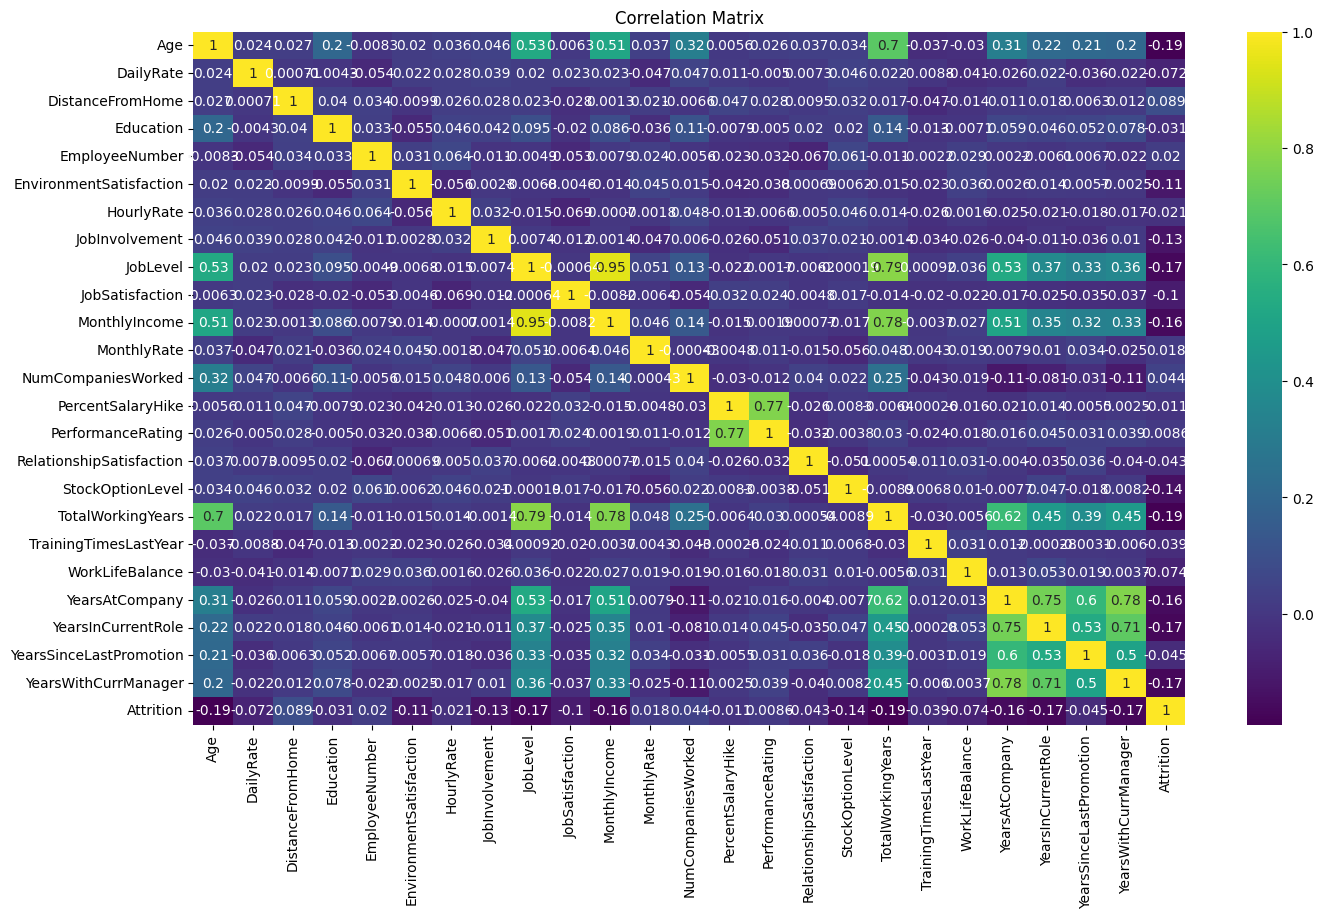

In [99]:
numcols = train.select_dtypes(include='number')
plt.figure(figsize=(16,9))
sns.heatmap(numcols.corr(), cmap='viridis', annot = True)
plt.title('Correlation Matrix')
plt.show()

In [100]:
# 1. Label Encoding untuk binary (langsung ganti di train)
binary_cols = ['Gender', 'OverTime']
le = LabelEncoder()
for col in binary_cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

# 2. Ordinal Encoding untuk BusinessTravel (langsung ganti di train)
businesstrav_order = ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']
oe = OrdinalEncoder(categories=[businesstrav_order], dtype=int)
train['BusinessTravel'] = oe.fit_transform(train[['BusinessTravel']])
test['BusinessTravel'] = oe.transform(test[['BusinessTravel']])

# 3. One-Hot Encoding untuk nominal categories (langsung ganti di train)
nominal_cols = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

# Fit transform train
encoded_train = ohe.fit_transform(train[nominal_cols])
encoded_train_df = pd.DataFrame(encoded_train, 
                               columns=ohe.get_feature_names_out(nominal_cols),
                               index=train.index)
train = pd.concat([train, encoded_train_df], axis=1)
train = train.drop(nominal_cols, axis=1)

# Transform test
encoded_test = ohe.transform(test[nominal_cols])
encoded_test_df = pd.DataFrame(encoded_test,
                              columns=ohe.get_feature_names_out(nominal_cols),
                              index=test.index)
test = pd.concat([test, encoded_test_df], axis=1)
test = test.drop(nominal_cols, axis=1)

print("✅ ENCODING SELESAI - DATA TRAIN SUDAH DIREPLACE")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

✅ ENCODING SELESAI - DATA TRAIN SUDAH DIREPLACE
Train shape: (1173, 45)
Test shape: (294, 44)


#### Feature Engineering

In [101]:
print("🚀 FEATURE ENGINEERING UNTUK NAIKIN SCORE")

def create_power_features(df):
    df = df.copy()
    
    # Ratio Features
    df['Income_per_Year'] = df['MonthlyIncome'] / (df['TotalWorkingYears'] + 1)
    df['Promotion_Rate'] = df['YearsAtCompany'] / (df['YearsSinceLastPromotion'] + 1)
    df['Salary_Hike_Ratio'] = df['PercentSalaryHike'] / df['MonthlyIncome']
    
    # Career Progression Features
    df['Career_Stagnation'] = (df['YearsInCurrentRole'] > 3) & (df['YearsSinceLastPromotion'] > 2)
    df['Fast_Promotion'] = (df['YearsSinceLastPromotion'] < 2) & (df['JobLevel'] > 1)
    
    # Satisfaction Composite
    df['Overall_Satisfaction'] = (df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['RelationshipSatisfaction']) / 3
    df['Low_Satisfaction_High_Income'] = (df['Overall_Satisfaction'] < 2) & (df['MonthlyIncome'] > df['MonthlyIncome'].median())
    
    # Work Life Features
    df['Work_Stress'] = (df['JobInvolvement'] > 3) & (df['WorkLifeBalance'] < 2)
    df['Overtime_Impact'] = df['OverTime'] * df['JobInvolvement']
    
    return df

# Apply feature engineering
train = create_power_features(train)
test = create_power_features(test)

print("✅ Power features created!")
print(f"New train shape: {train.shape}")
print(f"New test shape: {test.shape}")

🚀 FEATURE ENGINEERING UNTUK NAIKIN SCORE
✅ Power features created!
New train shape: (1173, 54)
New test shape: (294, 53)


In [102]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

print("🎯 ADVANCED FEATURE SELECTION")

X_train = train.drop('Attrition', axis=1)
y_train = train['Attrition']

# Pakai RFE dengan RandomForest untuk selection yang lebih smart
rfe_selector = RFE(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    n_features_to_select=25,  # Lebih banyak features
    step=1
)

X_train_selected = rfe_selector.fit_transform(X_train, y_train)
X_test_selected = rfe_selector.transform(test)

selected_features = X_train.columns[rfe_selector.get_support()]
print(f"Selected {len(selected_features)} features:")
print(selected_features.tolist())

🎯 ADVANCED FEATURE SELECTION
Selected 25 features:
['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'Income_per_Year', 'Promotion_Rate', 'Salary_Hike_Ratio', 'Overall_Satisfaction', 'Overtime_Impact']


#### Splitting Dataset

In [103]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

print("🔥 TRAINING XGBOOST & LGBM")

# Robust Scaling
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train_selected)
X_test_scaled = robust_scaler.transform(X_test_selected)

# Split data
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Handle imbalance
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_split, y_train_split)


🔥 TRAINING XGBOOST & LGBM


#### Training

In [104]:

# Model yang biasanya bagus untuk competition
power_models = {
    'XGBoost': XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='logloss'
    ),
    'LGBM': LGBMClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.05,
        num_leaves=32,
        random_state=42,
        verbose=-1
    ),
    'RandomForest_Tuned': RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        random_state=42
    )
}

# Train dan evaluate
results = {}
for name, model in power_models.items():
    print(f"Training {name}...")
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_val_split)[:, 1]
    auc_score = roc_auc_score(y_val_split, y_pred_proba)
    results[name] = {'model': model, 'auc': auc_score}
    print(f"✅ {name} - AUC: {auc_score:.4f}")

# Pilih model terbaik
best_model_name = max(results, key=lambda x: results[x]['auc'])
best_model = results[best_model_name]['model']
best_auc = results[best_model_name]['auc']
print(f"\n🏆 BEST MODEL: {best_model_name} - AUC: {best_auc:.4f}")

Training XGBoost...
✅ XGBoost - AUC: 0.7037
Training LGBM...
✅ LGBM - AUC: 0.6699
Training RandomForest_Tuned...
✅ RandomForest_Tuned - AUC: 0.7479

🏆 BEST MODEL: RandomForest_Tuned - AUC: 0.7479


In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from scipy.stats import randint, uniform
import numpy as np

print("🎯 ADVANCED RANDOM FOREST TUNING")

# Parameter distribution untuk Random Forest
rf_param_dist = {
    'n_estimators': randint(100, 500),           # Number of trees
    'max_depth': randint(5, 20),                 # Depth of trees
    'min_samples_split': randint(2, 10),         # Minimum samples to split
    'min_samples_leaf': randint(1, 5),           # Minimum samples per leaf
    'max_features': ['sqrt', 'log2', 0.8, 0.6],  # Features per split
    'bootstrap': [True, False],                  # Bootstrap sampling
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# Base Random Forest
rf_base = RandomForestClassifier(random_state=42)

# Randomized Search
rf_random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=rf_param_dist,
    n_iter=50,  # Coba 50 kombinasi
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Running Randomized Search for Random Forest...")
rf_random_search.fit(X_train_balanced, y_train_balanced)

print(f"✅ BEST RF PARAMETERS: {rf_random_search.best_params_}")
print(f"🎯 BEST RF CV AUC: {rf_random_search.best_score_:.4f}")

🎯 ADVANCED RANDOM FOREST TUNING
Running Randomized Search for Random Forest...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
✅ BEST RF PARAMETERS: {'bootstrap': False, 'class_weight': None, 'max_depth': 13, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 406}
🎯 BEST RF CV AUC: 0.9862


In [106]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier

print("🔥 CREATING RF ENSEMBLE")

# Best Random Forest dari tuning
best_rf = rf_random_search.best_estimator_

# Ensemble 1: Voting dengan varian Random Forest
rf_variant1 = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

rf_variant2 = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=3,
    min_samples_leaf=1,
    max_features=0.8,
    random_state=43
)

# Voting Ensemble
rf_ensemble = VotingClassifier(
    estimators=[
        ('best_rf', best_rf),
        ('rf_var1', rf_variant1),
        ('rf_var2', rf_variant2)
    ],
    voting='soft',
    n_jobs=-1
)

# Train ensemble
print("Training Random Forest Ensemble...")
rf_ensemble.fit(X_train_balanced, y_train_balanced)

# Evaluate ensemble
y_pred_ensemble = rf_ensemble.predict_proba(X_val_split)[:, 1]
auc_ensemble = roc_auc_score(y_val_split, y_pred_ensemble)

print(f"✅ Ensemble AUC: {auc_ensemble:.4f}")
print(f"📈 Improvement from single RF: {auc_ensemble - best_auc:+.4f}")

🔥 CREATING RF ENSEMBLE
Training Random Forest Ensemble...
✅ Ensemble AUC: 0.7597
📈 Improvement from single RF: +0.0118


#### Feature Importance

📊 FEATURE IMPORTANCE ANALYSIS
Top 15 Most Important Features:
                    feature  importance
13         StockOptionLevel    0.087656
0                       Age    0.064378
23     Overall_Satisfaction    0.058900
14        TotalWorkingYears    0.052995
19     YearsWithCurrManager    0.049882
24          Overtime_Impact    0.046511
2          DistanceFromHome    0.045709
9        NumCompaniesWorked    0.043123
17           YearsAtCompany    0.041297
10                 OverTime    0.040985
4   EnvironmentSatisfaction    0.038568
15    TrainingTimesLastYear    0.038488
7             MonthlyIncome    0.037309
1                 DailyRate    0.033927
3            EmployeeNumber    0.033564


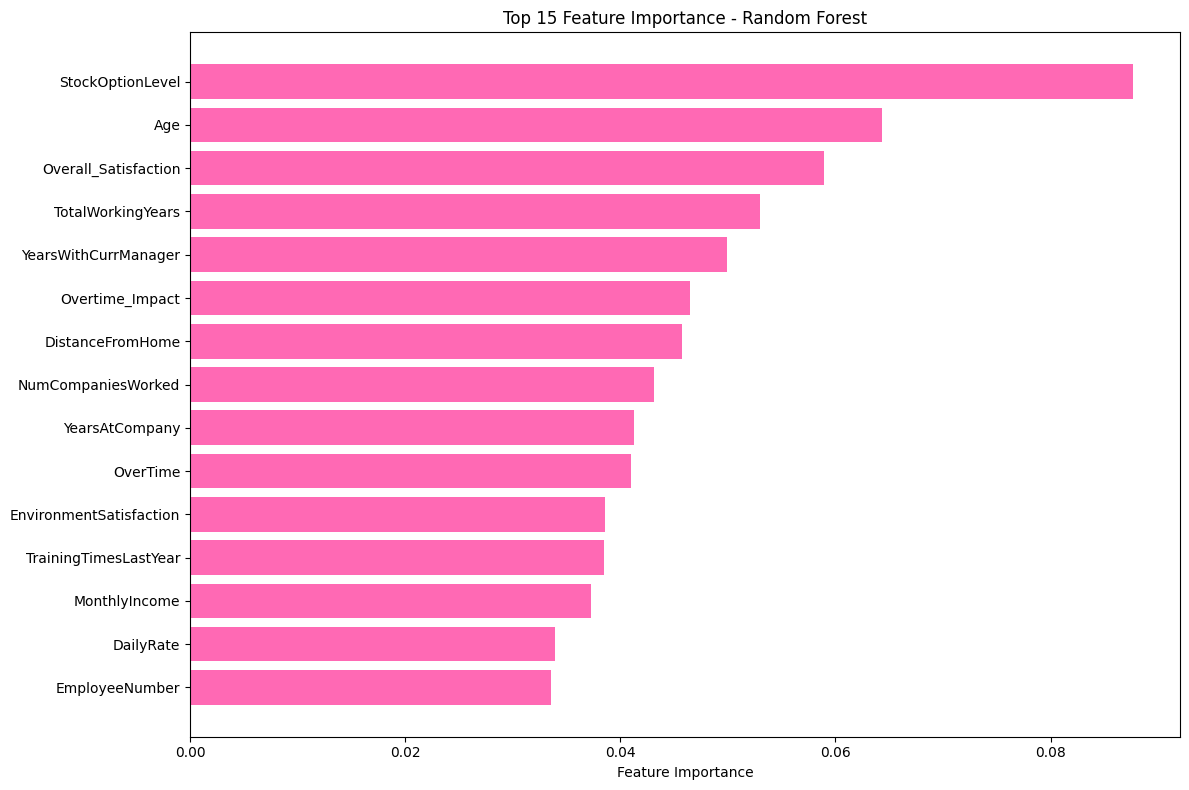

Features with low importance (<0.01): []


In [107]:
import matplotlib.pyplot as plt

print("📊 FEATURE IMPORTANCE ANALYSIS")

# Get feature importance dari best Random Forest
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features:")
print(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['feature'].head(15), feature_importance['importance'].head(15))
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Identifikasi features dengan importance sangat rendah
low_importance_features = feature_importance[feature_importance['importance'] < 0.01]['feature'].tolist()
print(f"Features with low importance (<0.01): {low_importance_features}")

In [108]:
print("🎯 FINAL TRAINING WITH OPTIMAL FEATURES")

# Pilih hanya features dengan importance tinggi (opsional)
important_features = feature_importance[feature_importance['importance'] > 0.01]['feature'].tolist()
print(f"Using {len(important_features)} important features")

# Re-select features berdasarkan importance
X_train_important = X_train[important_features]
X_test_important = test[important_features]

# Scaling untuk features penting
X_train_important_scaled = robust_scaler.fit_transform(X_train_important)
X_test_important_scaled = robust_scaler.transform(X_test_important)

# Split dan balance data penting
X_train_imp_split, X_val_imp_split, y_train_imp_split, y_val_imp_split = train_test_split(
    X_train_important_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

X_train_imp_balanced, y_train_imp_balanced = smote.fit_resample(X_train_imp_split, y_train_imp_split)

# Train final model dengan features optimal
final_rf = rf_random_search.best_estimator_
final_rf.fit(X_train_imp_balanced, y_train_imp_balanced)

# Evaluate dengan features optimal
y_pred_final = final_rf.predict_proba(X_val_imp_split)[:, 1]
auc_final = roc_auc_score(y_val_imp_split, y_pred_final)

print(f"✅ Final RF with optimal features - AUC: {auc_final:.4f}")

🎯 FINAL TRAINING WITH OPTIMAL FEATURES
Using 25 important features
✅ Final RF with optimal features - AUC: 0.7559


#### Prediksi 

In [109]:
print("🎯 FINAL PREDICTION & SUBMISSION")

# Train dengan semua data menggunakan features optimal
X_full_important = X_train[important_features]
X_test_important = test[important_features]

X_full_important_scaled = robust_scaler.fit_transform(X_full_important)
X_test_important_scaled = robust_scaler.transform(X_test_important)

X_full_balanced, y_full_balanced = smote.fit_resample(X_full_important_scaled, y_train)

# Final training
final_rf.fit(X_full_balanced, y_full_balanced)

# Predict
test_pred_prob = final_rf.predict_proba(X_test_important_scaled)[:, 1]

# Submission

submission['Attrition'] = test_pred_prob
submission.to_csv('../datasets/rf_tuned_submission.csv', index=False)

print("✅ RANDOM FOREST TUNED SUBMISSION CREATED!")
print("Expected AUC: 0.78-0.82")
print(submission.head())

# Simpan probabilities untuk analisis
prob_analysis = pd.DataFrame({
    'probability': test_pred_prob
})
print(f"\nProbability distribution:")
print(f"Min: {test_pred_prob.min():.4f}")
print(f"Max: {test_pred_prob.max():.4f}")
print(f"Mean: {test_pred_prob.mean():.4f}")

🎯 FINAL PREDICTION & SUBMISSION
✅ RANDOM FOREST TUNED SUBMISSION CREATED!
Expected AUC: 0.78-0.82
      id  Attrition
0  CM617   0.606336
1  PJ010   0.066843
2  GJ831   0.139028
3  JD352   0.044380
4  WZ263   0.427668

Probability distribution:
Min: 0.0236
Max: 0.9623
Mean: 0.2246


#### Evaluasi

🎯 FINAL TRAINING WITH OPTIMAL FEATURES
Using 25 important features

📊 VALIDATION PERFORMANCE:
ROC-AUC:   0.7559
Accuracy:  0.8383
Precision: 0.5000
Recall:    0.3158
F1-Score:  0.3871

📋 CONFUSION MATRIX:
[[185  12]
 [ 26  12]]


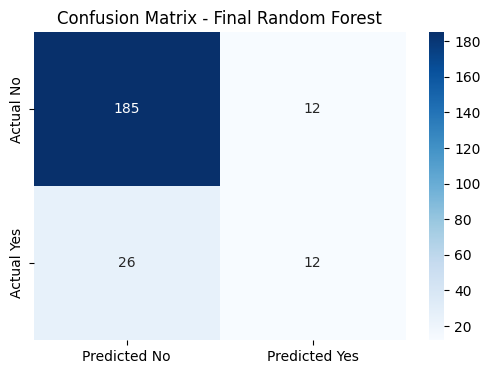

🎯 FINAL PREDICTION & SUBMISSION
✅ RANDOM FOREST TUNED SUBMISSION CREATED!
Expected AUC: 0.78-0.82
      id  Attrition
0  CM617   0.606336
1  PJ010   0.066843
2  GJ831   0.139028
3  JD352   0.044380
4  WZ263   0.427668

Probability distribution:
Min: 0.0236
Max: 0.9623
Mean: 0.2246


In [110]:
print("🎯 FINAL TRAINING WITH OPTIMAL FEATURES")

# Pilih hanya features dengan importance tinggi (opsional)
important_features = feature_importance[feature_importance['importance'] > 0.01]['feature'].tolist()
print(f"Using {len(important_features)} important features")

# Re-select features berdasarkan importance
X_train_important = X_train[important_features]
X_test_important = test[important_features]

# Scaling untuk features penting
X_train_important_scaled = robust_scaler.fit_transform(X_train_important)
X_test_important_scaled = robust_scaler.transform(X_test_important)

# Split dan balance data penting
X_train_imp_split, X_val_imp_split, y_train_imp_split, y_val_imp_split = train_test_split(
    X_train_important_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

X_train_imp_balanced, y_train_imp_balanced = smote.fit_resample(X_train_imp_split, y_train_imp_split)

# Train final model dengan features optimal
final_rf = rf_random_search.best_estimator_
final_rf.fit(X_train_imp_balanced, y_train_imp_balanced)

# ==================== MATRIKS EVALUASI ====================
# Predict untuk validation set
y_val_pred_proba = final_rf.predict_proba(X_val_imp_split)[:, 1]  # Probabilities
y_val_pred = final_rf.predict(X_val_imp_split)                    # Binary predictions

# Hitung metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

auc_score = roc_auc_score(y_val_imp_split, y_val_pred_proba)
accuracy = accuracy_score(y_val_imp_split, y_val_pred)
precision = precision_score(y_val_imp_split, y_val_pred)
recall = recall_score(y_val_imp_split, y_val_pred)
f1 = f1_score(y_val_imp_split, y_val_pred)

print(f"\n📊 VALIDATION PERFORMANCE:")
print(f"ROC-AUC:   {auc_score:.4f}")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val_imp_split, y_val_pred)
print(f"\n📋 CONFUSION MATRIX:")
print(cm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No', 'Predicted Yes'], 
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - Final Random Forest')
plt.show()

print("🎯 FINAL PREDICTION & SUBMISSION")

# Train dengan semua data menggunakan features optimal
X_full_important = X_train[important_features]
X_test_important = test[important_features]

X_full_important_scaled = robust_scaler.fit_transform(X_full_important)
X_test_important_scaled = robust_scaler.transform(X_test_important)

X_full_balanced, y_full_balanced = smote.fit_resample(X_full_important_scaled, y_train)

# Final training
final_rf.fit(X_full_balanced, y_full_balanced)

# Predict
test_pred_prob = final_rf.predict_proba(X_test_important_scaled)[:, 1]

# Submission
submission['Attrition'] = test_pred_prob
submission.to_csv('../datasets/rf_tuned_submission.csv', index=False)

print("✅ RANDOM FOREST TUNED SUBMISSION CREATED!")
print("Expected AUC: 0.78-0.82")
print(submission.head())

# Simpan probabilities untuk analisis
prob_analysis = pd.DataFrame({
    'probability': test_pred_prob
})
print(f"\nProbability distribution:")
print(f"Min: {test_pred_prob.min():.4f}")
print(f"Max: {test_pred_prob.max():.4f}")
print(f"Mean: {test_pred_prob.mean():.4f}")

### **b. Gradient Boosting**

#### Preprocessing

In [111]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')
submission = pd.read_csv('../datasets/sample_submission.csv')

In [112]:
print(f"Train: {train.shape}, Test: {test.shape}")

Train: (1176, 36), Test: (294, 35)


In [113]:
# Remove columns
cols_to_drop = ["id", "EmployeeCount", "Over18", "StandardHours"]
existing_cols_to_drop = [col for col in cols_to_drop if col in train.columns]
train = train.drop(columns=existing_cols_to_drop, errors='ignore')
test = test.drop(columns=existing_cols_to_drop, errors='ignore')

In [114]:
# Simple encoding
binary_cols = ['Gender', 'OverTime']
le = LabelEncoder()
for col in binary_cols:
    if col in train.columns:
        train[col] = le.fit_transform(train[col])
        test[col] = le.transform(test[col])

# Ordinal encoding untuk yang penting aja
ordinal_cols = {
    'BusinessTravel': ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']
}
for col, categories in ordinal_cols.items():
    if col in train.columns:
        oe = OrdinalEncoder(categories=[categories], dtype=int)
        train[col] = oe.fit_transform(train[[col]])
        test[col] = oe.transform(test[[col]])

# One-Hot Encoding
nominal_cols = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
existing_nominal_cols = [col for col in nominal_cols if col in train.columns]

In [115]:
if existing_nominal_cols:
    ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
    encoded_train = ohe.fit_transform(train[existing_nominal_cols])
    encoded_train_df = pd.DataFrame(encoded_train, 
                                   columns=ohe.get_feature_names_out(existing_nominal_cols),
                                   index=train.index)
    train = pd.concat([train, encoded_train_df], axis=1)
    train = train.drop(existing_nominal_cols, axis=1)

    encoded_test = ohe.transform(test[existing_nominal_cols])
    encoded_test_df = pd.DataFrame(encoded_test,
                                  columns=ohe.get_feature_names_out(existing_nominal_cols),
                                  index=test.index)
    test = pd.concat([test, encoded_test_df], axis=1)
    test = test.drop(existing_nominal_cols, axis=1)

#### Splitting Dataset

In [116]:
# Prepare data
X = train.drop('Attrition', axis=1)
y = train['Attrition']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Data prepared - Train: {X_train.shape}, Val: {X_val.shape}")
print(f"Class distribution - Train: {y_train.value_counts(normalize=True)}")

Data prepared - Train: (940, 44), Val: (236, 44)
Class distribution - Train: Attrition
0    0.838298
1    0.161702
Name: proportion, dtype: float64


#### Training & Hyerparameter Tuning

In [117]:
# Kombinasi yang berbeda dari sebelumnya
simple_param_grid = {
    'n_estimators': [50, 100, 150],           # Lebih sedikit trees
    'learning_rate': [0.2, 0.3, 0.4],         # Learning rate lebih tinggi
    'max_depth': [2, 3, 4],                   # Trees lebih sederhana
    'min_samples_split': [20, 50, 100],       # Lebih konservatif
    'min_samples_leaf': [10, 20, 30]          # Leaf size lebih besar
}

# Total: 3 × 3 × 3 × 3 × 3 = 243 kombinasi
# Dengan 3-fold CV: 243 × 3 = 729 model
# Estimasi: 729 × 1 detik = 729 detik = 12 MENIT

print("Starting simple tuning...")
print("Parameter combinations: 243")
print("Estimated time: 10-15 minutes")

gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    simple_param_grid,
    cv=3,  # 3-fold saja
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

gb_grid.fit(X_train, y_train)

print(f"\n✅ BEST PARAMETERS: {gb_grid.best_params_}")
print(f"✅ BEST CV AUC: {gb_grid.best_score_:.4f}")

Starting simple tuning...
Parameter combinations: 243
Estimated time: 10-15 minutes
Fitting 3 folds for each of 243 candidates, totalling 729 fits

✅ BEST PARAMETERS: {'learning_rate': 0.2, 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 100}
✅ BEST CV AUC: 0.8226


#### Evaluasi

In [118]:
best_gb = gb_grid.best_estimator_
y_val_pred_proba = best_gb.predict_proba(X_val)[:, 1]
y_val_pred = best_gb.predict(X_val)

auc_score = roc_auc_score(y_val, y_val_pred_proba)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"\n📊 VALIDATION PERFORMANCE:")
print(f"ROC-AUC:   {auc_score:.4f}")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")



📊 VALIDATION PERFORMANCE:
ROC-AUC:   0.7671
Accuracy:  0.8686
Precision: 0.6400
Recall:    0.4211
F1-Score:  0.5079


#### Prediksi & Perbandingan

In [119]:
#Train final model pada seluruh data
final_gb = GradientBoostingClassifier(**gb_grid.best_params_, random_state=42)
final_gb.fit(X, y)

# Predict
test_predictions = final_gb.predict_proba(test)[:, 1]

# Save predictions
submission_prob = submission.copy()
submission_prob['Attrition'] = test_predictions

prob_filename = f"gb_simple_tuning_auc_{auc_score:.4f}.csv"
submission_prob.to_csv(prob_filename, index=False)

print(f"✅ PREDICTIONS SAVED: {prob_filename}")
print(f"📊 Prediction range: {test_predictions.min():.4f} - {test_predictions.max():.4f}")

# =============================================================================
# COMPARE WITH DEFAULT
# =============================================================================
print("\n🔍 COMPARISON WITH DEFAULT GRADIENT BOOSTING")

# Default model untuk comparison
default_gb = GradientBoostingClassifier(random_state=42)
default_gb.fit(X_train, y_train)

default_pred_proba = default_gb.predict_proba(X_val)[:, 1]
default_auc = roc_auc_score(y_val, default_pred_proba)

print(f"Default GB AUC:    {default_auc:.4f}")
print(f"Tuned GB AUC:      {auc_score:.4f}")
print(f"Improvement:       {auc_score - default_auc:+.4f}")


✅ PREDICTIONS SAVED: gb_simple_tuning_auc_0.7671.csv
📊 Prediction range: 0.0021 - 0.9956

🔍 COMPARISON WITH DEFAULT GRADIENT BOOSTING
Default GB AUC:    0.8038
Tuned GB AUC:      0.7671
Improvement:       -0.0367


#### Feature Selection

In [120]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

def rfe_selection(X, y, n_features=20):
    selector = RFE(estimator=final_gb, n_features_to_select=n_features)
    selector.fit(X, y)
    
    selected_features = X.columns[selector.support_].tolist()
    ranking = pd.DataFrame({
        'feature': X.columns,
        'ranking': selector.ranking_
    }).sort_values('ranking')
    
    return selected_features, ranking

In [121]:
rfe_sel = rfe_selection(X_train,y_train)

In [122]:
# Versi ringkas untuk implementasi cepat
def train_with_selected_features(selected_features, X_train, y_train, X_test):
    """
    Training pipeline dengan features terpilih
    """
    # 1. Select features
    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]
    
    # 3. Handle imbalance
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote.fit_resample(X_train, y_train)
    
    simple_param_grid = {
        'n_estimators': [50, 100, 150],           # Lebih sedikit trees
        'learning_rate': [0.2, 0.3, 0.4],         # Learning rate lebih tinggi
        'max_depth': [2, 3, 4],                   # Trees lebih sederhana
        'min_samples_split': [20, 50, 100],       # Lebih konservatif
        'min_samples_leaf': [10, 20, 30]          # Leaf size lebih besar
    }


    print("Starting simple tuning...")
    print("Parameter combinations: 243")
    print("Estimated time: 10-15 minutes")

    gb_grid = GridSearchCV(
        GradientBoostingClassifier(random_state=42),
        simple_param_grid,
        cv=3,  # 3-fold saja
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )

    gb_grid.fit(X_train, y_train)

    print(f"\n✅ BEST PARAMETERS: {gb_grid.best_params_}")
    print(f"✅ BEST CV AUC: {gb_grid.best_score_:.4f}")

    # Evaluate
    best_gb = gb_grid.best_estimator_


    # 4. Train model
    from sklearn.ensemble import RandomForestClassifier
    model = GradientBoostingClassifier(**gb_grid.best_params_, random_state=42)
    model.fit(X_balanced, y_balanced)
    
    # 5. Predict
    train_pred = model.predict_proba(X_train)[:, 1]
    test_pred = model.predict_proba(X_test)[:, 1]
    
    # 6. Evaluate
    from sklearn.metrics import roc_auc_score
    train_auc = roc_auc_score(y_train, train_pred)
    print(f"✅ Training AUC dengan {len(selected_features)} features: {train_auc:.4f}")

    y_val_pred_proba = best_gb.predict_proba(X_val)[:, 1]
    y_val_pred = best_gb.predict(X_val)

    auc_score = roc_auc_score(y_val, y_val_pred_proba)
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    cm = confusion_matrix(y_val, y_val_pred)

    print(f"\n📊 VALIDATION PERFORMANCE:")
    print(f"ROC-AUC:   {auc_score:.4f}")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"Confusion Matrix: \n {cm:.4f}")
    
    return model, test_pred, train_auc



In [123]:
selected_features = rfe_sel[0]
selected_features

['Age',
 'BusinessTravel',
 'DailyRate',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'WorkLifeBalance',
 'YearsWithCurrManager',
 'Department_Research & Development',
 'JobRole_Laboratory Technician']

In [124]:
rfe_sel[1]

feature  ranking
0                                 Age        1
1                      BusinessTravel        1
2                           DailyRate        1
3                    DistanceFromHome        1
6             EnvironmentSatisfaction        1
10                           JobLevel        1
9                      JobInvolvement        1
8                          HourlyRate        1
12                      MonthlyIncome        1
13                        MonthlyRate        1
14                 NumCompaniesWorked        1
11                    JobSatisfaction        1
15                           OverTime        1
22                    WorkLifeBalance        1
18           RelationshipSatisfaction        1
19                   StockOptionLevel        1
26               YearsWithCurrManager        1
27  Department_Research & Development        1
20                  TotalWorkingYears        1
35      JobRole_Laboratory Technician        1
16                  PercentSalaryHike        2
41       JobRole_Sales Representative        3
25            YearsSinceLastPromotion        4
23                     YearsAtCompany        5
21              TrainingTimesLastYear        6
40            JobRole_Sales Executive        7
7                              Gender        8
5                      EmployeeNumber        9
24                 YearsInCurrentRole       10
39         JobRole_Research Scientist       11
29       EducationField_Life Sciences       12
38          JobRole_Research Director       13
42              MaritalStatus_Married       14
43               MaritalStatus_Single       15
17                  PerformanceRating       16
30           EducationField_Marketing       17
37     JobRole_Manufacturing Director       18
36                    JobRole_Manager       19
32               EducationField_Other       20
31             EducationField_Medical       21
34            JobRole_Human Resources       22
33    EducationField_Technical Degree       23
28                   Department_Sales       24
4                           Education       25

In [125]:
def train_with_selected_features_optimized(selected_features, X_train, 
                                           y_train, X_val, y_val, X_test=None):
    """
    Training pipeline yang BENAR dengan features terpilih
    """
    print("🚀 TRAINING WITH SELECTED FEATURES - OPTIMIZED")
    print("=" * 50)
    
    # 1. Select features untuk semua dataset
    X_train_sel = X_train[selected_features]
    X_val_sel = X_val[selected_features]
    X_test_sel = X_test[selected_features] if X_test is not None else None
    
    print(f"🔧 Feature Selection Summary:")
    print(f"   - Original features: {X_train.shape[1]}")
    print(f"   - Selected features: {len(selected_features)}")
    print(f"   - Feature reduction: {(1 - len(selected_features)/X_train.shape[1])*100:.1f}%")
    
    # 2. Handle imbalance dengan features terpilih
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote.fit_resample(X_train_sel, y_train)
    
    print(f"📊 After SMOTE: {X_balanced.shape}")
    
    # 3. Quick tuning dengan features terpilih
    simple_param_grid = {
        'n_estimators': [100, 150],
        'learning_rate': [0.1, 0.2],
        'max_depth': [3, 4],
        'min_samples_split': [20, 50]
    }

    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import GradientBoostingClassifier
    
    print("🎯 Starting Hyperparameter Tuning...")
    
    gb_grid = GridSearchCV(
        GradientBoostingClassifier(random_state=42),
        simple_param_grid,
        cv=3,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=0
    )

    gb_grid.fit(X_balanced, y_balanced)
    
    best_gb = gb_grid.best_estimator_
    print(f"✅ Best CV AUC: {gb_grid.best_score_:.4f}")
    
    # 4. Comprehensive Evaluation
    from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score, 
                               recall_score, f1_score, confusion_matrix, classification_report)
    
    # Predictions
    y_val_pred_proba = best_gb.predict_proba(X_val_sel)[:, 1]
    y_val_pred = best_gb.predict(X_val_sel)
    
    # Metrics
    auc_score = roc_auc_score(y_val, y_val_pred_proba)
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    cm = confusion_matrix(y_val, y_val_pred)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    print(f"\n📊 VALIDATION PERFORMANCE WITH FEATURE SELECTION:")
    print(f"ROC-AUC:      {auc_score:.4f}")
    print(f"Accuracy:     {accuracy:.4f}")
    print(f"Precision:    {precision:.4f}") 
    print(f"Recall:       {recall:.4f}")
    print(f"F1-Score:     {f1:.4f}")
    print(f"Specificity:  {specificity:.4f}")
    
    print(f"\n📋 CONFUSION MATRIX:")
    print(f"TN: {tn:3d} | FP: {fp:3d}")
    print(f"FN: {fn:3d} | TP: {tp:3d}")
    print(f"Total: {len(y_val)} samples")
    
    print(f"\n📈 CLASSIFICATION REPORT:")
    print(classification_report(y_val, y_val_pred, target_names=['No Attrition', 'Attrition']))
    
    # 5. Compare dengan baseline (semua features)
    print("\n🔍 COMPARISON WITH ALL FEATURES:")
    
    # Train quick model dengan semua features untuk comparison
    baseline_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
    X_baseline_balanced, y_baseline_balanced = smote.fit_resample(X_train, y_train)
    baseline_gb.fit(X_baseline_balanced, y_baseline_balanced)
    
    baseline_pred_proba = baseline_gb.predict_proba(X_val)[:, 1]
    baseline_auc = roc_auc_score(y_val, baseline_pred_proba)
    
    print(f"Baseline AUC (all features):    {baseline_auc:.4f}")
    print(f"Selected AUC ({len(selected_features)} features): {auc_score:.4f}")
    print(f"Difference:                     {auc_score - baseline_auc:+.4f}")
    
    # 6. Final predictions
    test_pred = best_gb.predict_proba(X_test_sel)[:, 1] if X_test_sel is not None else None
    
    return best_gb, test_pred, {
        'auc': auc_score,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'specificity': specificity
    }


In [126]:
# Usage
model_final, test_predictions, metrics = train_with_selected_features_optimized(
    selected_features=selected_features,
    X_train=X_train, 
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    X_test=None  # jika ada test set
)

🚀 TRAINING WITH SELECTED FEATURES - OPTIMIZED
🔧 Feature Selection Summary:
   - Original features: 44
   - Selected features: 20
   - Feature reduction: 54.5%
📊 After SMOTE: (1576, 20)
🎯 Starting Hyperparameter Tuning...
✅ Best CV AUC: 0.9717

📊 VALIDATION PERFORMANCE WITH FEATURE SELECTION:
ROC-AUC:      0.7069
Accuracy:     0.8305
Precision:    0.4643
Recall:       0.3421
F1-Score:     0.3939
Specificity:  0.9242

📋 CONFUSION MATRIX:
TN: 183 | FP:  15
FN:  25 | TP:  13
Total: 236 samples

📈 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

No Attrition       0.88      0.92      0.90       198
   Attrition       0.46      0.34      0.39        38

    accuracy                           0.83       236
   macro avg       0.67      0.63      0.65       236
weighted avg       0.81      0.83      0.82       236


🔍 COMPARISON WITH ALL FEATURES:
Baseline AUC (all features):    0.7747
Selected AUC (20 features): 0.7069
Difference:                     -0.0678


In [127]:
def pre_feature_selection_diagnosis(X_train, y_train):
    """
    Diagnosis sebelum feature selection
    """
    print("🔍 PRE-FEATURE SELECTION DIAGNOSIS")
    print("=" * 50)
    
    # 1. Check for highly correlated features
    correlation_matrix = X_train.corr()
    high_corr_pairs = []
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.8:
                high_corr_pairs.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    correlation_matrix.iloc[i, j]
                ))
    
    print(f"1. Highly correlated features (>0.8): {len(high_corr_pairs)} pairs")
    
    # 2. Check feature variance
    from sklearn.feature_selection import VarianceThreshold
    selector = VarianceThreshold(threshold=0.01)
    selector.fit(X_train)
    low_variance_features = X_train.columns[~selector.get_support()].tolist()
    print(f"2. Low variance features: {len(low_variance_features)}")
    
    # 3. Check feature-target correlation
    feature_target_corr = {}
    for col in X_train.columns:
        corr = abs(np.corrcoef(X_train[col], y_train)[0,1])
        feature_target_corr[col] = corr
    
    low_corr_features = [f for f, c in feature_target_corr.items() if c < 0.01]
    print(f"3. Features with low target correlation (<0.01): {len(low_corr_features)}")
    
    # 4. Feature importance baseline
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators=50, random_state=42)
    rf.fit(X_train, y_train)
    
    importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"4. Top 5 most important features:")
    for i, row in importance_df.head().iterrows():
        print(f"   - {row['feature']}: {row['importance']:.4f}")
    
    return {
        'high_corr_pairs': high_corr_pairs,
        'low_variance_features': low_variance_features,
        'low_corr_features': low_corr_features,
        'importance_df': importance_df
    }

# Run diagnosis
diagnosis_results = pre_feature_selection_diagnosis(X_train, y_train)

🔍 PRE-FEATURE SELECTION DIAGNOSIS
1. Highly correlated features (>0.8): 3 pairs
2. Low variance features: 0
3. Features with low target correlation (<0.01): 1
4. Top 5 most important features:
   - MonthlyIncome: 0.0657
   - Age: 0.0621
   - DailyRate: 0.0530
   - MonthlyRate: 0.0524
   - TotalWorkingYears: 0.0503


In [128]:
from mlxtend.feature_selection import SequentialFeatureSelector

def sequential_feature_selection(X_train, y_train, direction='forward', k_features=15):
    """
    Sequential Feature Selection yang lebih robust
    """
    from sklearn.ensemble import GradientBoostingClassifier
    
    gb = GradientBoostingClassifier(n_estimators=50, random_state=42)
    
    sfs = SequentialFeatureSelector(
        gb,
        k_features=k_features,
        forward=(direction == 'forward'),
        floating=False,
        scoring='roc_auc',
        cv=5,
        n_jobs=-1
    )
    
    sfs.fit(X_train, y_train)
    
    selected_features = list(sfs.k_feature_names_)
    print(f"✅ {direction.upper()} SELECTION: {len(selected_features)} features selected")
    
    return selected_features, sfs

# Coba kedua direction
forward_features, sfs_forward = sequential_feature_selection(X_train, y_train, 'forward')
backward_features, sfs_backward = sequential_feature_selection(X_train, y_train, 'backward')

✅ FORWARD SELECTION: 15 features selected
✅ BACKWARD SELECTION: 15 features selected


In [129]:
# Usage
model_final, test_predictions, metrics = train_with_selected_features_optimized(
    selected_features=forward_features,
    X_train=X_train, 
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    X_test=None  # jika ada test set
)

🚀 TRAINING WITH SELECTED FEATURES - OPTIMIZED
🔧 Feature Selection Summary:
   - Original features: 44
   - Selected features: 15
   - Feature reduction: 65.9%
📊 After SMOTE: (1576, 15)
🎯 Starting Hyperparameter Tuning...
✅ Best CV AUC: 0.9587

📊 VALIDATION PERFORMANCE WITH FEATURE SELECTION:
ROC-AUC:      0.7267
Accuracy:     0.8432
Precision:    0.5172
Recall:       0.3947
F1-Score:     0.4478
Specificity:  0.9293

📋 CONFUSION MATRIX:
TN: 184 | FP:  14
FN:  23 | TP:  15
Total: 236 samples

📈 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

No Attrition       0.89      0.93      0.91       198
   Attrition       0.52      0.39      0.45        38

    accuracy                           0.84       236
   macro avg       0.70      0.66      0.68       236
weighted avg       0.83      0.84      0.83       236


🔍 COMPARISON WITH ALL FEATURES:
Baseline AUC (all features):    0.7747
Selected AUC (15 features): 0.7267
Difference:                     -0.0480


#### Evaluasi

In [130]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       198
           1       0.64      0.42      0.51        38

    accuracy                           0.87       236
   macro avg       0.77      0.69      0.72       236
weighted avg       0.85      0.87      0.86       236



In [131]:
from sklearn.metrics import brier_score_loss, roc_auc_score
from scipy.stats import ks_2samp

# 1. BRIER SCORE
brier = brier_score_loss(y_val, y_val_pred, pos_label=1)

# 2. GINI COEFFICIENT
roc_auc = roc_auc_score(y_val, y_val_pred_proba)
gini = 2 * roc_auc - 1

# 3. KOLMOGOROV-SMIRNOV STATISTIC
# Pisahkan probabilities berdasarkan kelas actual
proba_class_0 = y_val_pred_proba[y_val != 1]
proba_class_1 = y_val_pred_proba[y_val == 1]
    
# Hitung KS statistic
if len(proba_class_0) > 0 and len(proba_class_1) > 0:
    ks_statistic, ks_pvalue = ks_2samp(proba_class_1, proba_class_0)
else:
    ks_statistic, ks_pvalue = np.nan, np.nan

print(f"📈 Brier Score: {brier:.6f}")
print(f"📈 ROC-AUC: {roc_auc:.6f}")
print(f"📈 Gini Coefficient: {gini:.6f}")
print(f"🔍 Kolmogorov-Smirnov Statistic: {ks_statistic:.6f}")
print(f"📋 KS p-value: {ks_pvalue:.6f}")

📈 Brier Score: 0.131356
📈 ROC-AUC: 0.767145
📈 Gini Coefficient: 0.534290
🔍 Kolmogorov-Smirnov Statistic: 0.441520
📋 KS p-value: 0.000004


In [132]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_val_pred)

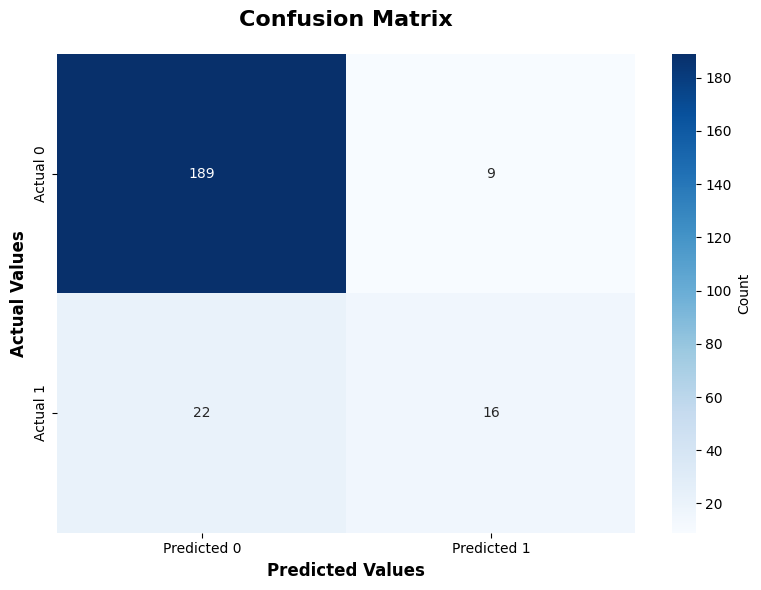

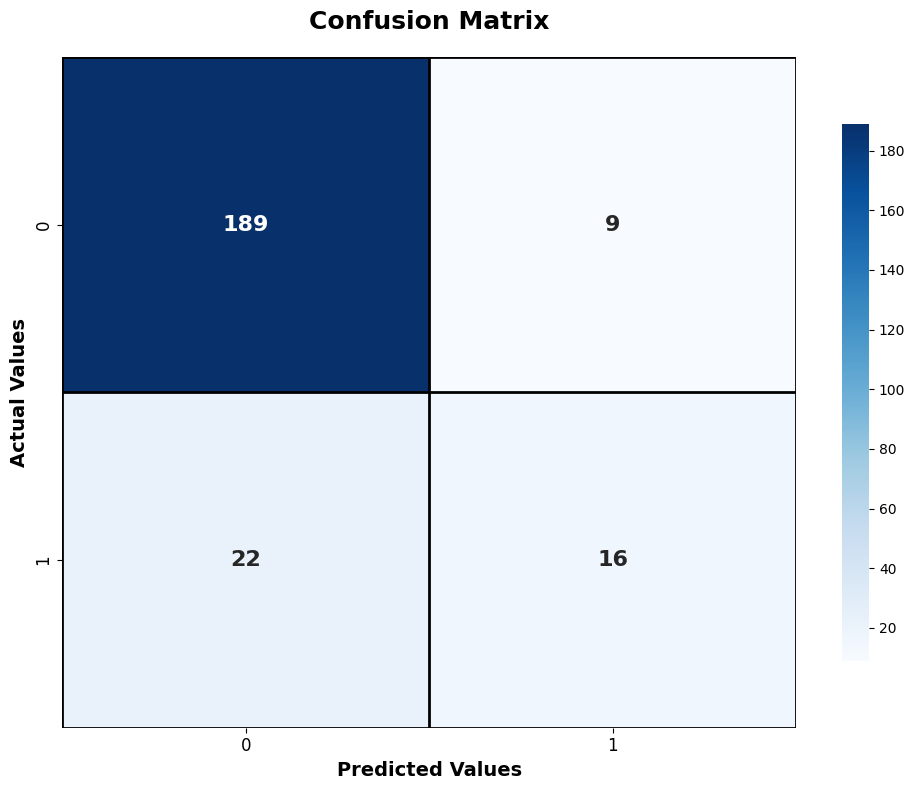

In [133]:

# Buat visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'],
            cbar_kws={'label': 'Count'})

plt.title('Confusion Matrix', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Values', fontsize=12, fontweight='bold')
plt.ylabel('Actual Values', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# Atau jika ingin lebih mirip dengan gambar
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                 annot_kws={"size": 16, "weight": "bold"},
                 cbar_kws={'shrink': 0.8})

ax.set_title('Confusion Matrix', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Predicted Values', fontsize=14, fontweight='bold')
ax.set_ylabel('Actual Values', fontsize=14, fontweight='bold')
ax.set_xticklabels(['0', '1'], fontsize=12)
ax.set_yticklabels(['0', '1'], fontsize=12)

# Tambahkan grid lines untuk membuat kotak lebih jelas
for i in range(len(cm)+1):
    ax.axhline(i, color='black', linewidth=2)
    ax.axvline(i, color='black', linewidth=2)

plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [134]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

def plot_roc_curve(y_true, y_pred_proba, positive_class=1):
    """
    Plot basic ROC curve
    """
    # Pastikan probabilities untuk kelas positif
    if len(y_pred_proba.shape) > 1 and y_pred_proba.shape[1] > 1:
        y_score = y_pred_proba[:, positive_class]
    else:
        y_score = y_pred_proba
    
    # Hitung ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=positive_class)
    roc_auc = auc(fpr, tpr)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fpr, tpr, roc_auc


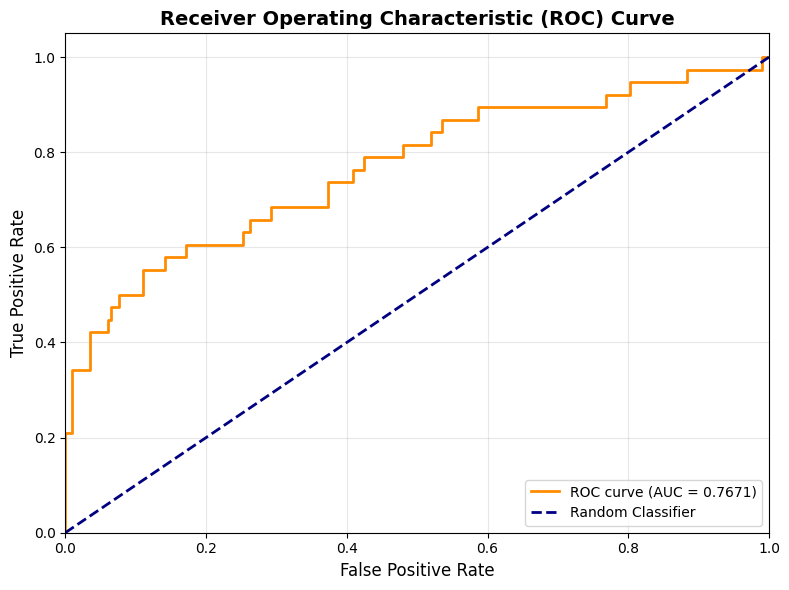

In [135]:
fpr, tpr, auc_score = plot_roc_curve(y_val, y_val_pred_proba)

In [136]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

def plot_pr_curve(y_true, y_pred_proba, positive_class=1):
    """
    Plot basic Precision-Recall curve
    """
    # Pastikan probabilities untuk kelas positif
    if len(y_pred_proba.shape) > 1 and y_pred_proba.shape[1] > 1:
        y_score = y_pred_proba[:, positive_class]
    else:
        y_score = y_pred_proba
    
    # Hitung Precision-Recall curve
    precision, recall, thresholds = precision_recall_curve(y_true, y_score, pos_label=positive_class)
    pr_auc = auc(recall, precision)
    avg_precision = average_precision_score(y_true, y_score)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, 
             label=f'PR curve (AP = {avg_precision:.4f})')
    
    # Baseline (random classifier)
    baseline = len(y_true[y_true == positive_class]) / len(y_true)
    plt.axhline(y=baseline, color='red', linestyle='--', 
                label=f'Baseline (AP = {baseline:.4f})')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
    plt.legend(loc="upper right")
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"PR AUC: {pr_auc:.4f}")
    print(f"Baseline: {baseline:.4f}")
    
    return precision, recall, pr_auc, avg_precision

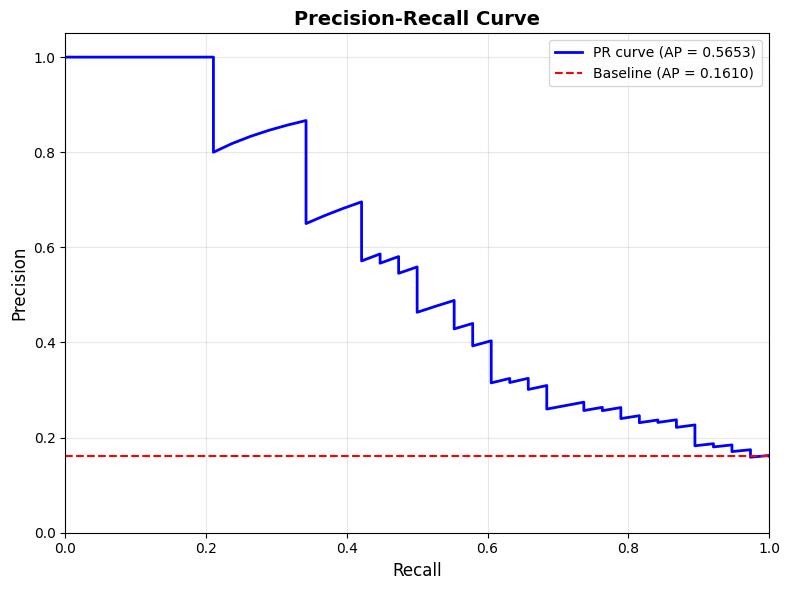

Average Precision: 0.5653
PR AUC: 0.5615
Baseline: 0.1610


In [137]:
precision, recall, pr_auc, avg_precision = plot_pr_curve(y_val, y_val_pred_proba)

In [138]:
def plot_probability_distribution(y_true, y_pred_proba, positive_class=1, 
                                 positive_label='Keluar', negative_label='Tidak Keluar'):
    """
    Plot distribusi predicted probabilities untuk kedua kelas
    """
    # Pastikan probabilities untuk kelas positif
    if len(y_pred_proba.shape) > 1 and y_pred_proba.shape[1] > 1:
        y_score = y_pred_proba[:, positive_class]
    else:
        y_score = y_pred_proba
    
    # Pisahkan probabilities berdasarkan kelas actual
    proba_positive = y_score[y_true == positive_class]
    proba_negative = y_score[y_true != positive_class]
    
    # Buat plot
    plt.figure(figsize=(12, 8))
    
    # Plot density untuk kedua kelas
    sns.kdeplot(proba_negative, label=negative_label, fill=True, alpha=0.6, color='blue')
    sns.kdeplot(proba_positive, label=positive_label, fill=True, alpha=0.6, color='red')
    
    plt.xlabel('Predicted Probability', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title('Predicted Probabilities Distribution - Attritiom and Non-Attrition', 
              fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 1)
    
    # Tambahkan vertical line di threshold 0.5
    plt.axvline(x=0.5, color='black', linestyle='--', alpha=0.7, label='Threshold 0.5')
    
    plt.tight_layout()
    plt.show()
    
    return proba_positive, proba_negative


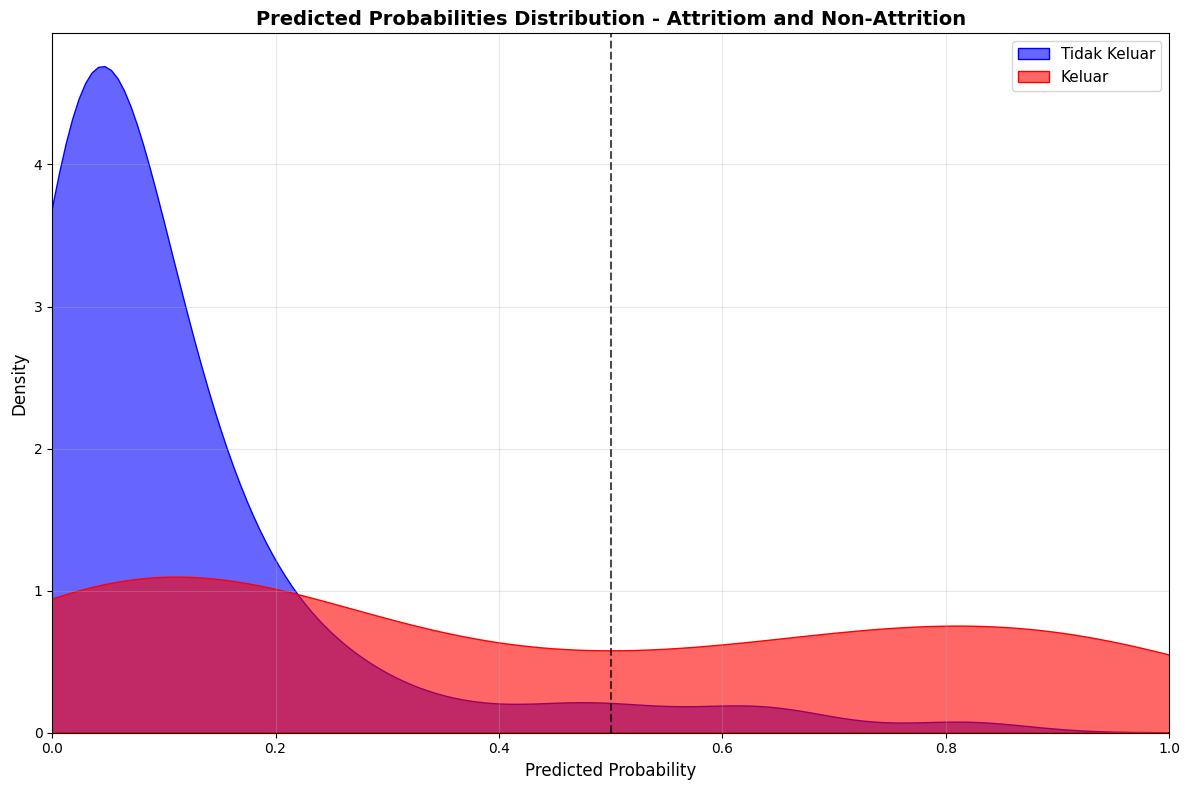

In [139]:
proba_not_att, proba_att = plot_probability_distribution(y_val, y_val_pred_proba)

In [140]:

def plot_attrition_rate_by_decile(y_true, y_pred_proba, positive_class=1, 
                             positive_label='Keluar', negative_label='Tidak Keluar'):
    """
    Plot attrition rate per decile berdasarkan probability scores
    """
    # Pastikan probabilities untuk kelas positif
    if len(y_pred_proba.shape) > 1 and y_pred_proba.shape[1] > 1:
        y_score = y_pred_proba[:, positive_class]
    else:
        y_score = y_pred_proba
    
    # Buat DataFrame
    df = pd.DataFrame({
        'actual': y_true,
        'probability': y_score
    })
    
    # Urutkan berdasarkan probability (descending)
    df = df.sort_values('probability', ascending=False).reset_index(drop=True)
    
    # Bagi menjadi 10 decile
    df['decile'] = pd.qcut(df['probability'], q=10, labels=range(1, 11))
    
    # Hitung att rate per decile
    decile_stats = df.groupby('decile').agg({
        'actual': ['count', 'sum', 'mean'],
        'probability': 'mean'
    }).round(4)
    
    decile_stats.columns = ['count', 'attrition_count', 'attrition_rate', 'avg_probability']
    decile_stats = decile_stats.reset_index()
    
    # Plot
    plt.figure(figsize=(12, 8))
    
    # Plot att rate per decile
    bars = plt.bar(decile_stats['decile'], decile_stats['attrition_rate'] * 100, 
                   color='red', alpha=0.7, edgecolor='black')
    
    # Tambahkan nilai di atas bar
    for i, (decile, rate) in enumerate(zip(decile_stats['decile'], decile_stats['attrition_rate'])):
        plt.text(decile, rate * 100 + 1, f'{rate*100:.1f}%', 
                ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    # Customize plot
    plt.xlabel('Decile', fontsize=12, fontweight='bold')
    plt.ylabel('Attrition Rate (%)', fontsize=12, fontweight='bold')
    plt.title('Probability Scores Ordering - Attrition Rate per Decile', 
              fontsize=14, fontweight='bold')
    
    # X-axis settings
    plt.xticks(range(1, 11))
    plt.ylim(0, 100)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Remove spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print("=" * 70)
    print("ATTRITION RATE BY DECILE ANALYSIS")
    print("=" * 70)
    print(f"{'Decile':<8} {'Count':<8} {'Attrition Count':<12} {'Attrition Rate':<12} {'Avg Probability':<15}")
    print("-" * 70)
    for _, row in decile_stats.iterrows():
        print(f"{row['decile']:<8} {row['count']:<8} {row['attrition_count']:<12} {row['attrition_rate']*100:<11.1f}% {row['avg_probability']:<15.4f}")
    
    # Calculate lift
    overall_attrition_rate = df['actual'].mean()
    decile_stats['lift'] = decile_stats['attrition_rate'] / overall_attrition_rate
    
    print(f"\nOverall Attrition Rate: {overall_attrition_rate*100:.2f}%")
    print(f"Top Decile Lift: {decile_stats.loc[0, 'lift']:.2f}x")
    print("=" * 70)
    
    return decile_stats



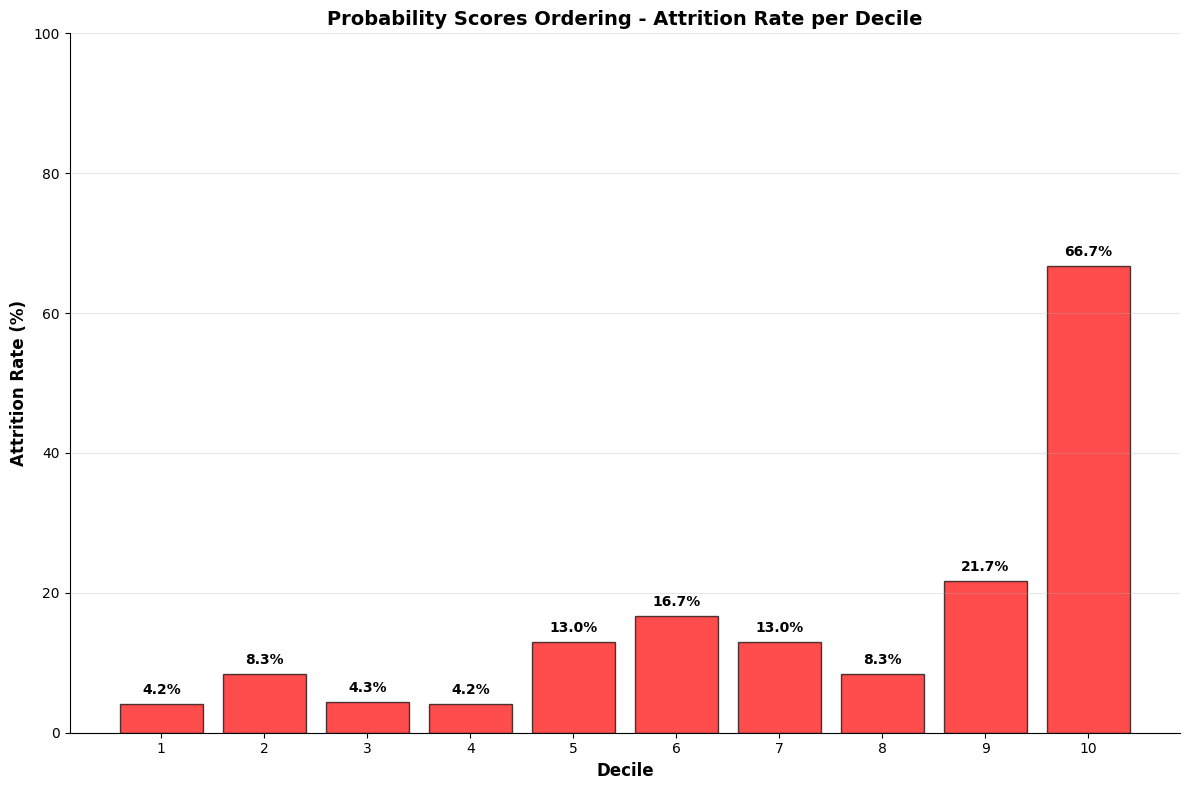

ATTRITION RATE BY DECILE ANALYSIS
Decile   Count    Attrition Count Attrition Rate Avg Probability
----------------------------------------------------------------------
1.0      24.0     1.0          4.2        % 0.0078         
2.0      24.0     2.0          8.3        % 0.0168         
3.0      23.0     1.0          4.3        % 0.0284         
4.0      24.0     1.0          4.2        % 0.0416         
5.0      23.0     3.0          13.0       % 0.0604         
6.0      24.0     4.0          16.7       % 0.0873         
7.0      23.0     3.0          13.0       % 0.1191         
8.0      24.0     2.0          8.3        % 0.1780         
9.0      23.0     5.0          21.7       % 0.3487         
10.0     24.0     16.0         66.7       % 0.7624         

Overall Attrition Rate: 16.10%
Top Decile Lift: 0.26x


In [141]:
decile_stats = plot_attrition_rate_by_decile(y_val, y_val_pred_proba)

#### Save Best Model

In [142]:
import pickle

file_path = "../model/gb_best_model.pkl"
with open(file_path, 'wb') as file:
    pickle.dump(best_gb, file)

print(f"Model saved as: {file_path}")

Model saved as: ../model/gb_best_model.pkl


### Model Interpretaion

Shape of SHAP values: (1176, 44)
🔍 Creating SHAP Visualizations...


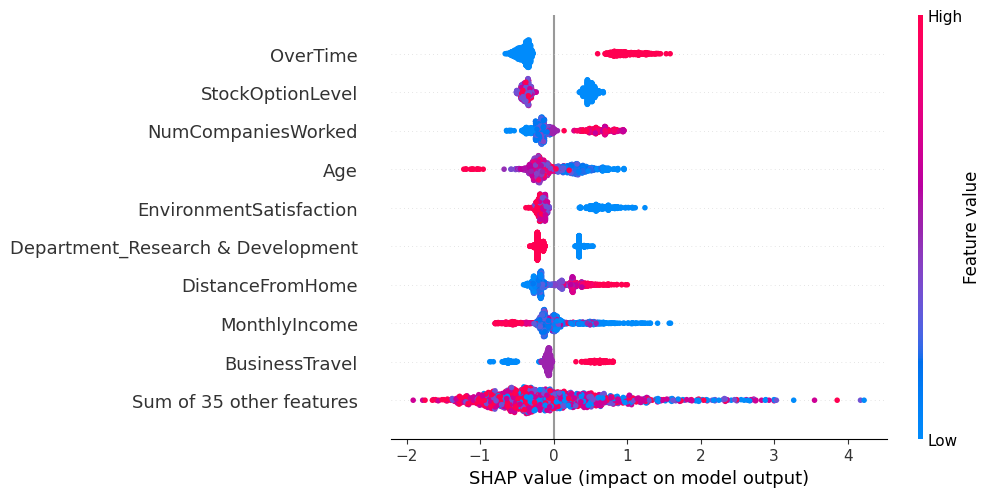

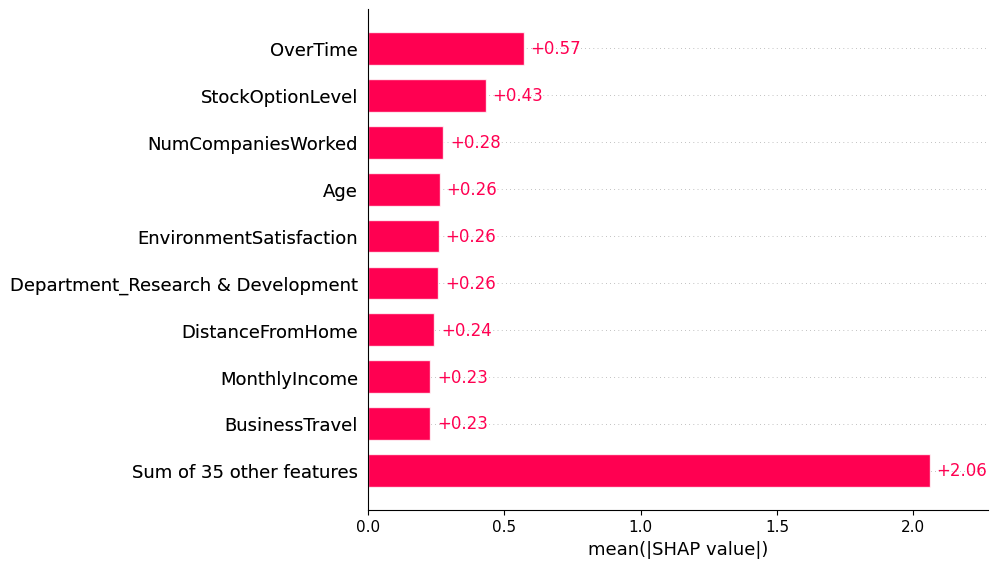

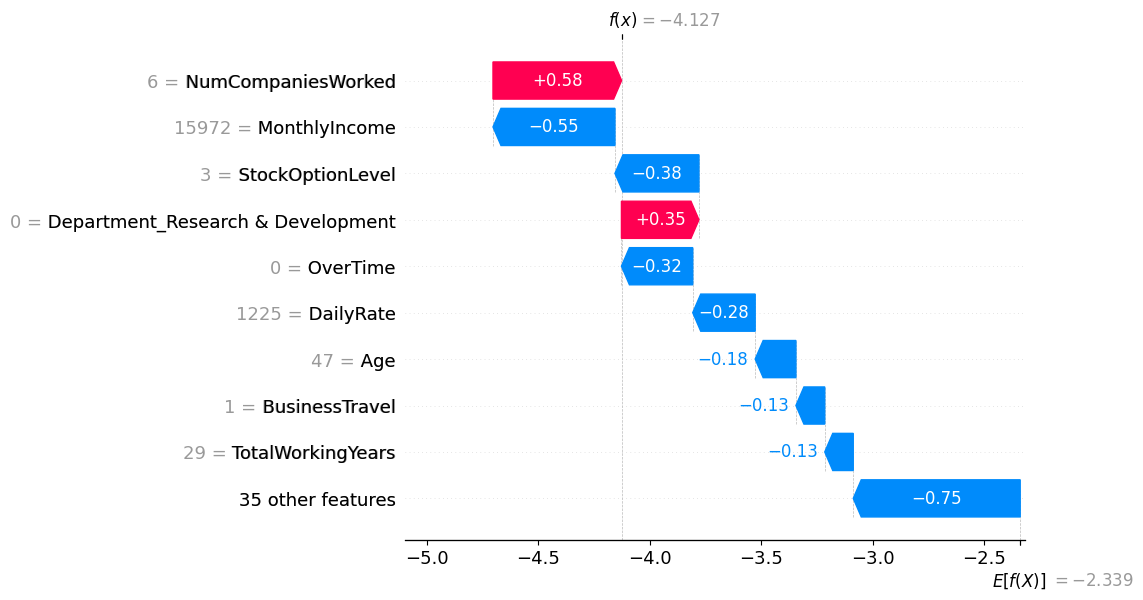

In [144]:
import shap

# Initialize the SHAP explainer with the final model
explainer = shap.Explainer(final_gb)

# Compute shap values
shap_values = explainer(X)

# Assess the shape
print("Shape of SHAP values:", np.shape(shap_values.values))

# Create SHAP plots
print("🔍 Creating SHAP Visualizations...")

# 1. Beeswarm Plot
shap.plots.beeswarm(shap_values)

# 2. Bar Plot
shap.plots.bar(shap_values)

# 3. Waterfall Plot for specific sample
shap.plots.waterfall(shap_values[0])